In [ ]:
Astropy User Guide: https://docs.astropy.org/en/stable/index_user_docs.html
Astropy Tutorials: https://learn.astropy.org/

In [44]:
from astropy import constants as const
from astropy import units as u

In [87]:
print(const.c)
print()
print(const.m_e)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018

  Name   = Electron mass
  Value  = 9.1093837015e-31
  Uncertainty  = 2.8e-40
  Unit  = kg
  Reference = CODATA 2018

  Name   = Boltzmann constant
  Value  = 1.380649e-23
  Uncertainty  = 0.0
  Unit  = J / K
  Reference = CODATA 2018


In [12]:
const.c.to('pc/yr')

<Quantity 0.30660139 pc / yr>

In [15]:
E = (const.m_e) * (const.c)**2
E.to('MeV')

<Quantity 0.51099895 MeV>

In [6]:
from IPython.display import Latex
# allows the %%latex command to be used
# keep cell format as Code

In [13]:
%%latex
\begin{equation}
l_\textup{P} = \sqrt {\frac {\hbar G} {c^3}}
\end{equation}

<IPython.core.display.Latex object>

In [33]:
import numpy as np
from astropy import constants as const
from astropy import units as u

In [68]:
l_P = np.sqrt((const.hbar * const.G) / (const.c)**3)
l_P.to('m')

<Quantity 1.61625502e-35 m>

In [89]:
%%latex

\begin{equation}
S_\textup{BH, Schwarz} = \frac {k_\textup{B} A} {4l_\textup{P}^2}
\end{equation}

<IPython.core.display.Latex object>

In [90]:
print(const.k_B)

  Name   = Boltzmann constant
  Value  = 1.380649e-23
  Uncertainty  = 0.0
  Unit  = J / K
  Reference = CODATA 2018


In [121]:
%%latex

\begin{equation}
A = 4 \pi R_\textup{s}^2
\end{equation}

<IPython.core.display.Latex object>

In [120]:
%%latex

\begin{equation}
R_\textup{s} = {\frac {2 G M_\bullet} {c^2}}
\end{equation}

<IPython.core.display.Latex object>

In [91]:
print(const.c)
print()
print(const.G)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


In [144]:
%%latex

\begin{equation}
S_\bullet \space \space (\textup{J/K}) = 3.663\times 10^{-7} \times  M_\bullet^2
\end{equation}

<IPython.core.display.Latex object>

In [146]:
# astropy imports
import astropy.coordinates as coord
from astropy.table import QTable
import astropy.units as u
from astroquery.gaia import Gaia   # astroquery can be mamba or pip-installed

# Third-party imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [167]:
query_text = '''SELECT TOP 2048 ra, dec, parallax, pmra, pmdec, radial_velocity,
phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
FROM gaiadr3.gaia_source
WHERE parallax_over_error > 10 AND
    parallax > 10 AND
    radial_velocity IS NOT null
ORDER BY random_index
'''

In [169]:
job = Gaia.launch_job(query_text)
gaia_data = job.get_results()
gaia_data.write('gaia_data.fits', overwrite=True)

In [170]:
gaia_data = QTable.read('gaia_data.fits')

In [171]:
gaia_data

ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
deg,deg,mas,mas / yr,mas / yr,km / s,mag,mag,mag
float64,float64,float64,float64,float64,float32,float32,float32,float32
132.10459270933268,2.271051596123523,12.599344304105063,4.013977357436915,66.10200703095197,35.98448181152344,11.12310791015625,11.694805145263672,10.408632278442383
251.09760693925082,-56.960100359866715,11.304311485078195,-35.37191646771424,-99.37431063079273,6.397059440612793,12.686421394348145,13.584908485412598,11.753893852233887
283.11044937721783,-26.150079226853457,12.38950294033803,-25.433928851662223,-58.70845697387051,-16.85479736328125,15.174003601074219,16.66272735595703,13.981807708740234
346.9667582183557,26.85576486361678,11.48592747665444,-36.02476515446429,17.65704049958199,11.243388175964355,14.446041107177734,15.624059677124023,13.370380401611328
117.37629290682426,-12.200919074659865,14.340502994035823,-71.42747433991039,108.30337301319516,58.80601501464844,14.479815483093262,15.907073974609375,13.308639526367188
159.82872414636526,15.979266838396848,20.903049825015874,221.51477060796813,-129.20693391178128,-20.69231414794922,14.49120044708252,15.928651809692383,13.31512451171875
275.31193740695926,-17.770596397048948,20.013567394029444,25.54167733892118,-52.43494598319242,20.986074447631836,14.182668685913086,15.673084259033203,12.990025520324707
247.00745055266052,-33.0594298957876,12.446468178396216,-5.535817219660187,-93.32911032994052,15.206486701965332,13.888916015625,15.287217140197754,12.727826118469238


In [172]:
# The following creates a CMD, using relative G-band magnitude first

m_G = gaia_data['phot_g_mean_mag']
BP_RP = gaia_data['phot_bp_mean_mag'] - gaia_data['phot_rp_mean_mag']

Text(0, 0.5, '$m_G$')

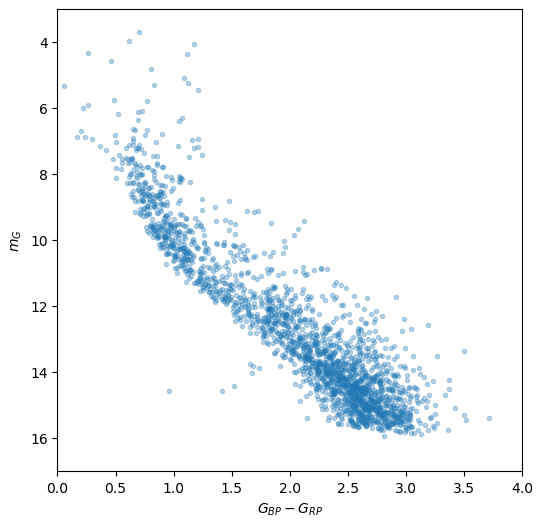

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(BP_RP.value, m_G.value, 
        marker='.', linestyle='none', alpha=0.3)

ax.set_xlim(0, 4)
ax.set_ylim(17, 3)

ax.set_xlabel('$G_{BP}-G_{RP}$')
ax.set_ylabel('$m_G$')

In [ ]:
# Use tutorial to plot M_G instead of m_G on y-ax-s - uses astropies .distmod attribute

In [160]:
# Now for a colour-colour diagram

BP_RP = gaia_data['phot_bp_mean_mag'] - gaia_data['phot_rp_mean_mag']
G_RP = gaia_data['phot_g_mean_mag'] - gaia_data['phot_rp_mean_mag']

In [1]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(BP_RP.value, G_RP.value, 
        marker='.', linestyle='none', alpha=0.3)

ax.set_xlim(0, 3)
ax.set_ylim(2, -0.1)

ax.set_xlabel('$G_{BP}-G_{RP}$')
ax.set_ylabel('$G_{G}-G_{RP}$')

NameError: name 'plt' is not defined

In [ ]:
# gala imports
# gala was pip-installed (not found in conda-forge)
import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

In [3]:
from pathlib import Path # replaces os, glob, shututil etc...
# https://realpython.com/python-pathlib/

import matplotlib.pyplot as plt

import numpy as np
import astropy.units as u
from astropy.table import Table
from dust_extinction.parameter_averages import CCM89, F99
from synphot import units, config
from synphot import SourceSpectrum, SpectralElement, Observation, ExtinctionModel1D
from synphot.models import BlackBodyNorm1D
from synphot.spectrum import BaseUnitlessSpectrum
from synphot.reddening import ExtinctionCurve
from astroquery.simbad import Simbad
from astroquery.mast import Observations
import astropy.visualization

<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
/var/folders/yh/dfgfv0352h73q219zg7p_hsw0000gn/T/ipykernel_40161/1795187298.py:10: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda^{-1}$ ($\mu$m$^{-1}$)')
/var/folders/yh/dfgfv0352h73q219zg7p_hsw0000gn/T/ipykernel_40161/1795187298.py:11: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('A($\lambda$) / A(V)')


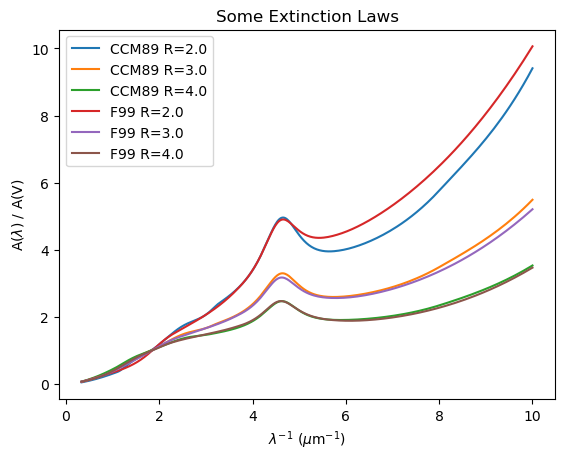

In [4]:
# Create wavelengths array.
wav = np.arange(0.1, 3.0, 0.001)*u.micron

for model in [CCM89, F99]:
    for R in (2.0,3.0,4.0):
        # Initialize the extinction model
        ext = model(Rv=R)
        plt.plot(1/wav, ext(wav), label=model.name+' R='+str(R))
        
plt.xlabel('$\lambda^{-1}$ ($\mu$m$^{-1}$)')
plt.ylabel('A($\lambda$) / A(V)')
plt.legend(loc='best')
plt.title('Some Extinction Laws')
plt.show()

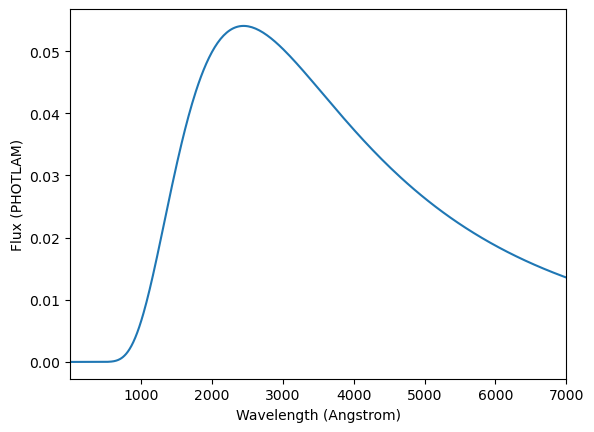

In [10]:
# Uses synphot - https://synphot.readthedocs.io/en/stable/
bb = SourceSpectrum(BlackBodyNorm1D, temperature=15000)
bb.plot(left=1, right=7000)

In [39]:
%%latex

\begin{equation}
\lambda_{peak} = \frac {2.898 \times 10^3}{T}  \space  \textup{m K}
\end{equation}

<IPython.core.display.Latex object>

In [40]:
%%latex

\begin{equation}
B_{\lambda}(T) = \frac {2hc^2}{\lambda^5}  \frac{1}{e^{hc/\lambda k_\textup{B}T}-1}
\end{equation}

<IPython.core.display.Latex object>

In [193]:
# Own Plot of BB Spectrum - need to sort out x-axis display of m to nm or Angstroms
lambd = np.arange(0.1,2000,1)*10**(-9) # wavelength
T = 5777 # temperature in Kelvin
B = ((2 * const.h.value * const.c.value**2) / (lambd**5)) * (np.e**((const.h.value * const.c.value) / (lambd * const.k_B.value * T)) - 1)**(-1)

/var/folders/yh/dfgfv0352h73q219zg7p_hsw0000gn/T/ipykernel_40161/3192275594.py:4: RuntimeWarning: overflow encountered in power
  B = ((2 * const.h.value * const.c.value**2) / (lambd**5)) * (np.e**((const.h.value * const.c.value) / (lambd * const.k_B.value * T)) - 1)**(-1)


<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
/var/folders/yh/dfgfv0352h73q219zg7p_hsw0000gn/T/ipykernel_40161/1533946266.py:2: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda (m)$')
/var/folders/yh/dfgfv0352h73q219zg7p_hsw0000gn/T/ipykernel_40161/1533946266.py:3: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$Spectral Radiance (W m^{-2} sr^{-1} \lambda^{-1})$')


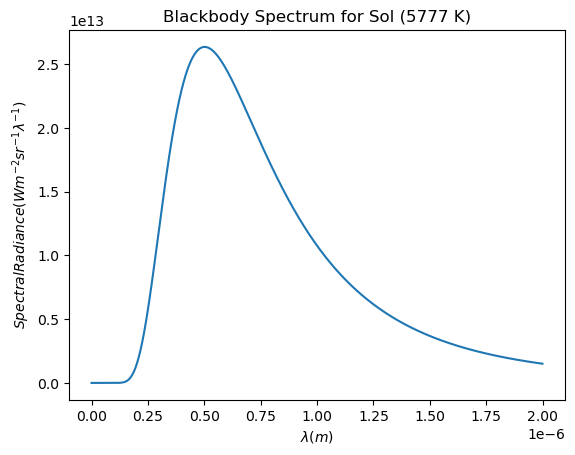

In [198]:
plt.plot(lambd, B)
plt.xlabel('$\lambda (m)$')
plt.ylabel('$Spectral Radiance (W m^{-2} sr^{-1} \lambda^{-1})$')
plt.title('Blackbody Spectrum for Sol (5777 K)')
plt.show()

In [ ]:
# Integrating this expression wrt to wavelength and getting the AUC gives the power output, e.g. 1367 W/m^2 for Sol

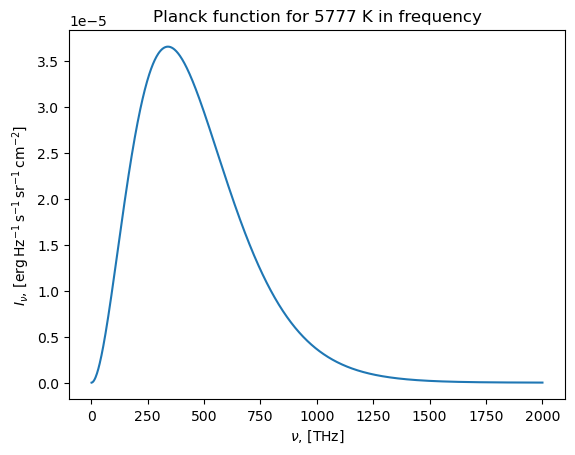

In [433]:
# Using frequency and cgs units

bb = BlackBody(5777. * u.Kelvin)

nu = np.linspace(1., 2000., 1000) * u.THz
bb5777K_nu = bb(nu)
plt.plot(nu, bb5777K_nu)
plt.xlabel(r'$\nu$, [{0:latex_inline}]'.format(nu.unit))
plt.ylabel(r'$I_{\nu}$, ' + '[{0:latex_inline}]'.format(bb5777K_nu.unit))
plt.title('Planck function for 5777 K in frequency')
plt.show()

In [353]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from astroquery.vizier import Vizier
import scipy.optimize

In [354]:
# Catalogue of Type II Cepheids
# https://cdsarc.cds.unistra.fr/viz-bin/ReadMe/J/A+A/605/A100?format=html&tex=true

from astroquery.vizier import Vizier

Vizier.ROW_LIMIT = -1  # this switches off the default limit if 50 rows to a table
catalog = Vizier.get_catalogs('J/A+A/605/A100')
print(catalog)

TableList with 1 tables:
	'0:J/A+A/605/A100/table1' with 16 column(s) and 264 row(s) 


In [428]:
# Vizier gives us a TableList of .dat tables
# To access the table we want, use the index, e.g. [0] or the name, e.g. ['J/A+A/605/A100/table1']
# It's handy to look up the Vizier website too and get further details of the data product
# for Vizier, use this search page: https://cdsarc.cds.unistra.fr/viz-bin/cat

catalog_table = catalog[0]
print(catalog_table)

   VVV-ID     OGLE-ID  Period Class ... E_J-Ks_ Simbad    _RA       _DE   
                         d          ...   mag             deg       deg   
------------ --------- ------ ----- ... ------- ------ --------- ---------
515601356315 T2CEP-002  2.268   BLH ...   0.173 Simbad 256.56250 -33.02433
515601679485 T2CEP-003  1.484   BLH ...   0.290 Simbad 257.16725 -32.90289
515594023082 T2CEP-005  2.008   BLH ...   0.388 Simbad 258.48767 -32.26000
515520862858 T2CEP-008  1.183   BLH ...   0.410 Simbad 261.08721 -27.93033
515555436341 T2CEP-009  1.896   BLH ...   0.461 Simbad 261.09287 -29.45986
515534145302 T2CEP-013  1.517   BLH ...   0.588 Simbad 261.99483 -29.43392
515543870338 T2CEP-014  1.239   BLH ...   0.534 Simbad 262.33321 -29.46542
515490128302 T2CEP-015  1.279   BLH ...   0.591 Simbad 263.61708 -27.10525
515522173203 T2CEP-017  1.098   BLH ...   0.636 Simbad 263.78387 -27.52381
         ...       ...    ...   ... ...     ...    ...       ...       ...
515498869630 T2CEP-332  1

In [356]:
period = np.array(catalog[0]['Period']) 
k_mag = np.array(catalog[0]['__Ksmag_'])
k_mag_err = np.array(catalog[0]['e__Ksmag_'])
log_period = np.log10(period)

Text(0, 0.5, 'Ks')

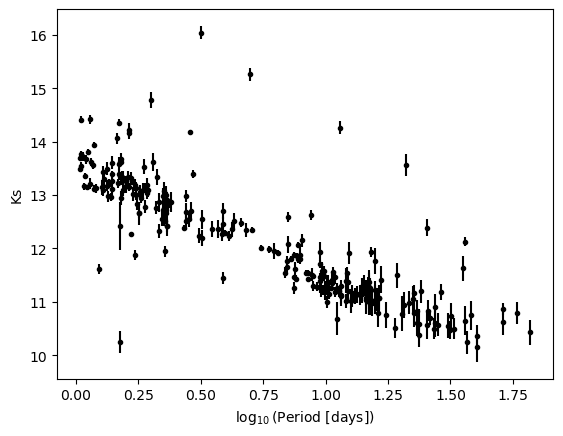

In [357]:
plt.errorbar(log_period, k_mag, k_mag_err, fmt='k.')
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')

In [358]:
# from astropy.modeling import models
model = models.Linear1D()

In [359]:
# from astropy.modeling import fitting
fitter = fitting.LinearLSQFitter() 

In [360]:
best_fit = fitter(model, log_period, k_mag, weights=1.0/k_mag_err)
print(best_fit)

# worked when ot was only 50 rows in the table
# now doesn't work with 264 rows of data as maybe not excluding outliers; might need to sigma clip - see astropy docs for further guidance

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    slope intercept
    ----- ---------
      nan       nan


Text(0, 0.5, 'Ks')

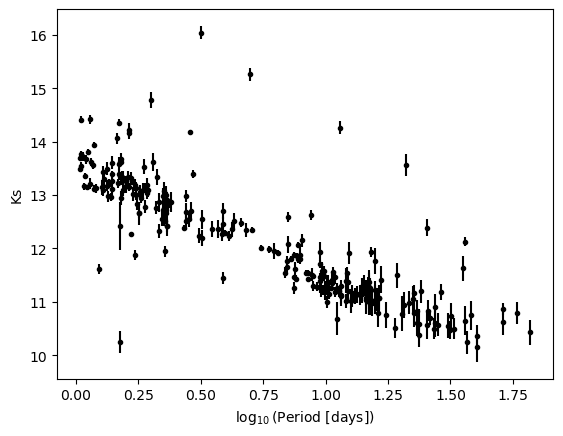

In [361]:
plt.errorbar(log_period,k_mag,k_mag_err,fmt='k.')
plt.plot(log_period, best_fit(log_period), color='g', linewidth=3)  
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')

In [362]:
model2 = models.Polynomial1D(degree=1)
fitter2 = fitting.LevMarLSQFitter()

In [363]:
best_fit2 = fitter(model2, log_period, k_mag, weights=1.0/k_mag_err)
print(best_fit2)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 1
Parameters:
     c0  c1
    --- ---
    nan nan


Text(0, 0.5, 'Ks')

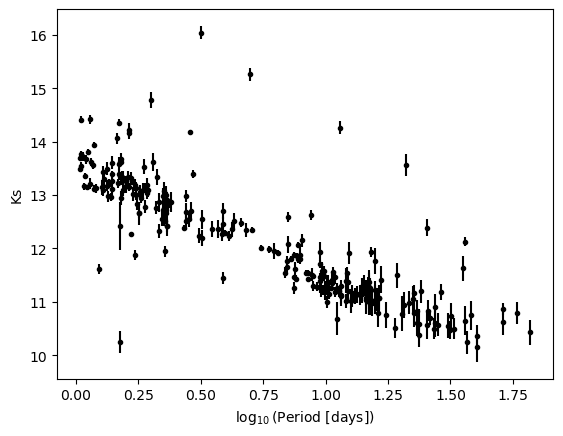

In [364]:
plt.errorbar(log_period,k_mag,k_mag_err,fmt='k.')
plt.plot(log_period, best_fit(log_period), color='g', linewidth=0.3)  
#plt.plot(log_period, best_fit2(log_period), color='r', linewidth=0.3)  
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')

In [365]:
# Now for some simulated data
N = 100
x1 = np.linspace(0, 4, N)  # Makes an array from 0 to 4 of N elements
y1 = x1**3 - 6*x1**2 + 12*x1 - 9 

# Now we add some noise to the data
y1 += np.random.normal(0, 2, size=len(y1)) # One way to add random gaussian noise
sigma = 1.5
y1_err = np.ones(N)*sigma 

Text(0, 0.5, '$y_1$')

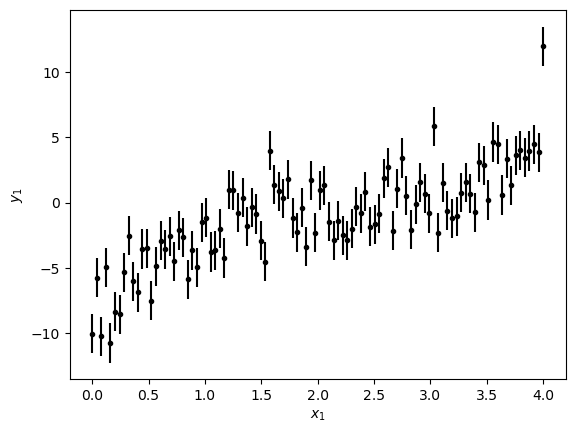

In [366]:
plt.errorbar(x1, y1, yerr=y1_err,fmt='k.')
plt.xlabel('$x_1$')  
plt.ylabel('$y_1$')

In [381]:
model_poly = models.Polynomial1D(degree=1)
fitter_poly = fitting.LinearLSQFitter() 
best_fit_poly = fitter_poly(model_poly, x1, y1, weights = 1.0/y1_err)

In [368]:
print(best_fit_poly)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
            c0                 c1                 c2                 c3        
    ------------------ ------------------ ------------------ ------------------
    -9.453774122232812 12.012024647894686 -5.576599027452449 0.8828004764762846


In [369]:
fitter_poly_2 = fitting.SimplexLSQFitter()
best_fit_poly_2 = fitter_poly_2(model_poly, x1, y1, weights = 1.0/y1_err)

In [370]:
print(best_fit_poly_2)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
            c0                 c1                 c2                  c3         
    ------------------ ------------------ ----------------- ---------------------
    -3.230461784364021 -1.258563695773673 1.044861030630573 -0.060307920783667056


In [371]:
def calc_reduced_chi_square(fit, x, y, yerr, N, n_free):
    '''
    fit (array) values for the fit
    x,y,yerr (arrays) data
    N total number of points
    n_free number of parameters we are fitting
    '''
    return 1.0/(N-n_free)*sum(((fit - y)/yerr)**2)

In [372]:
reduced_chi_squared = calc_reduced_chi_square(best_fit_poly(x1), x1, y1, y1_err, N, 4)
print('Reduced Chi Squared with LinearLSQFitter: {}'.format(reduced_chi_squared))

Reduced Chi Squared with LinearLSQFitter: 1.7909014280611164


In [373]:
reduced_chi_squared = calc_reduced_chi_square(best_fit_poly_2(x1), x1, y1, y1_err, N, 4)
print('Reduced Chi Squared with SimplexLSQFitter: {}'.format(reduced_chi_squared))

Reduced Chi Squared with SimplexLSQFitter: 3.173354115491388


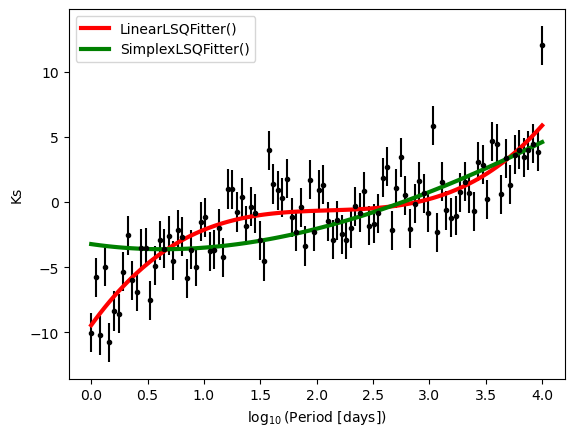

In [374]:
plt.errorbar(x1, y1, yerr=y1_err,fmt='k.')
plt.plot(x1, best_fit_poly(x1), color='r', linewidth=3, label='LinearLSQFitter()')  
plt.plot(x1, best_fit_poly_2(x1), color='g', linewidth=3, label='SimplexLSQFitter()')
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')
plt.legend()

Text(0, 0.5, '$y_3$')

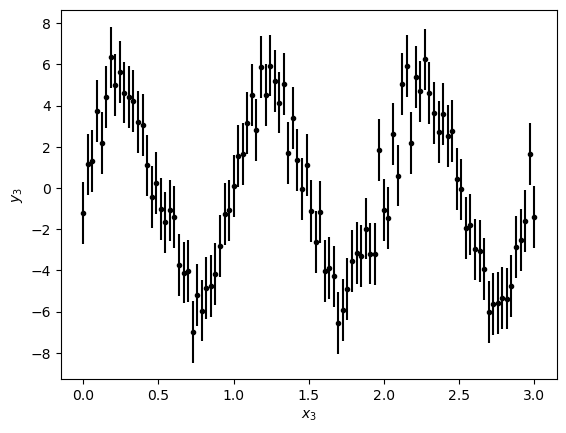

In [376]:
# Test data
N3 = 100
x3 = np.linspace(0, 3, N3)
y3 = 5.0 * np.sin(2 * np.pi * x3)
y3 = np.array([y_point + np.random.normal(0, 1) for y_point in y3])
sigma = 1.5
y3_err = np.ones(N)*sigma 

plt.errorbar(x3, y3, yerr=y3_err, fmt='k.')
plt.xlabel('$x_3$')
plt.ylabel('$y_3$')

In [382]:
# from astropy.modeling import models
# from astropy.modeling import fitting

model3 = models.Sine1D()
fitter3 = fitting.LevMarLSQFitter() # seems to work for sine wave models!

In [406]:
best_fit3 = fitter3(model3, x3, y3, weights = 1.0/y3_err)
print(best_fit3) # fit parameters of the sine model

Model: Sine1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude         frequency              phase        
    ----------------- ------------------ ---------------------
    4.816032409994266 0.9982306108224386 0.0012678415684336125


Text(0, 0.5, '$y_3$')

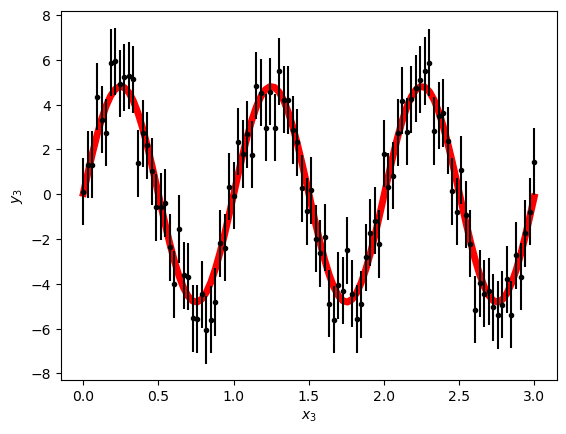

In [427]:
# Test data with Sine model fitted
N3 = 100
x3 = np.linspace(0, 3, N3)
y3 = 5.0 * np.sin(2 * np.pi * x3)
y3 = np.array([y_point + np.random.normal(0, 1) for y_point in y3])
sigma = 1.5
y3_err = np.ones(N)*sigma 

plt.plot(x3, best_fit3(x3), color='r', linewidth=5)  
plt.errorbar(x3, y3, yerr=y3_err, fmt='k.')
plt.xlabel('$x_3$')
plt.ylabel('$y_3$')

In [ ]:
Lomb-Scargle Periodogram
# https://docs.astropy.org/en/stable/timeseries/lombscargle.html
# https://iopscience.iop.org/article/10.3847/1538-4365/aab766

In [421]:
# import numpy as np
rand = np.random.default_rng(42)
t = 100 * rand.random(100)
dy = 0.1 * (1 + rand.random(100))
y = np.sin(2 * np.pi * t) + dy * rand.standard_normal(100)

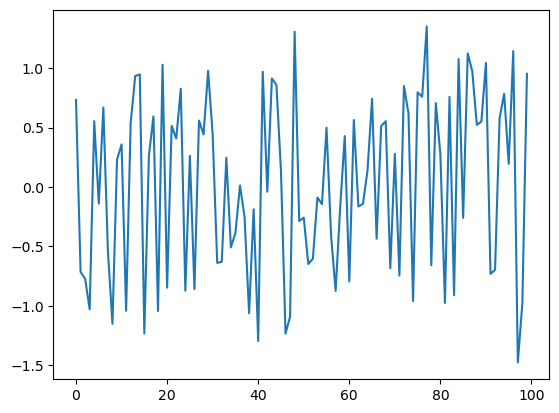

In [422]:
plt.plot(y)

Text(0, 0.5, 'Lomb-Scargle Power')

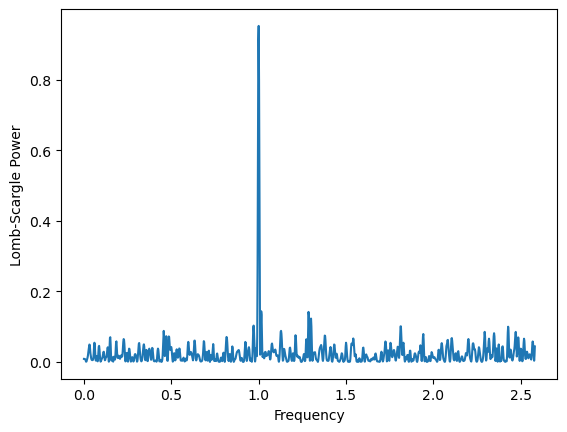

In [423]:
from astropy.timeseries import LombScargle

ls = LombScargle(t, y)
frequency, power = LombScargle(t, y, dy).autopower()

# Lomb-Scargle plot
plt.plot(frequency, power)
plt.xlabel("Frequency")
plt.ylabel("Lomb-Scargle Power")

In [424]:
# The highest power value occurs in the following index of the frequency array
index = np.argmax(power)

# This prints the value of the most powerful frequency
print("The highest power value occurs at a frequency of", frequency[index])

The highest power value occurs at a frequency of 1.0007641728995051


In [425]:
# Therefore the peak period is 1/frequency

print("The period of the signal from the variable star is", 1/frequency[index], "days")

The period of the signal from the variable star is 0.9992364106148094 days


In [426]:
# False Alarm Probability

print("The false alarm probability for a period of this many days is", ls.false_alarm_probability(power.max()))

The false alarm probability for a period of this many days is 9.412260765093816e-61


In [ ]:
# The Lomb-Scargle page in astropy also includes phase-folding of the periodogram; 
# can also use mod and div in numpy for this purpose (see my LJMU tutorial Notebook);
# think about how the maths of that works

In [470]:
a = np.mod(7.4, 1.3)
print(a)  # the remainder

0.9000000000000001


np.float64(0.9000000000000001)

In [472]:
c = np.divmod(7.6, 1.3)
print(c[0])
print(c[1])
# first value is the quotient, second value the remainder (mod)

5.0
1.0999999999999994


In [493]:
# Lomb-Scargle implementation for a periodic star
# example data periodic data file from: https://exoplanetarchive.ipac.caltech.edu/docs/pgram/pgram_recipe_1.html

t1 = Table.read('deltaScutiLightcurveSC.txt', format='ascii')

In [494]:
t1

col1,col2,col3
float64,float64,float64
504.6005622,2467925.8,231.7
504.6012433,2468173.5,231.7
504.6019245,2467686.2,231.6
504.6026057,2468066.0,231.6
504.6032867,2468122.5,231.6
504.6039678,2468200.8,231.6
504.604649,2467548.5,231.6
504.6053302,2467842.0,231.6
504.6060113,2468175.5,231.6


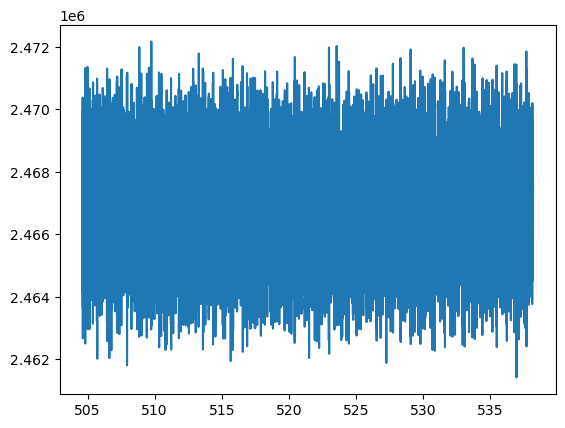

In [496]:
plt.plot(t1['col1'], t1['col2'])

Text(0, 0.5, 'Lomb-Scargle Power')

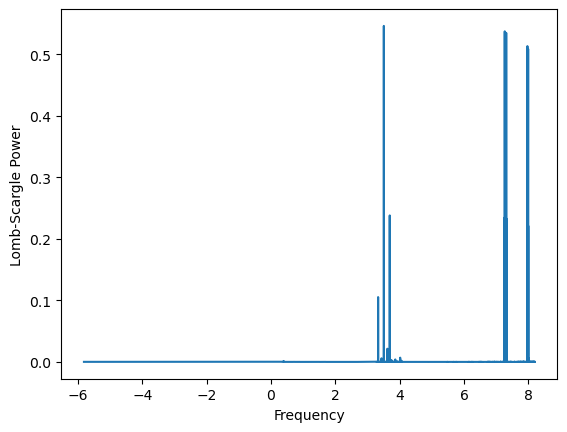

In [498]:
# Lomb-Scargle implementation

# L-S is not optimal for detecting signals from transiting exoplanets, where the shape of the periodic light curve is not sinusoidal

from astropy.timeseries import LombScargle

ls = LombScargle(t, y)
frequency, power = LombScargle(t1['col1'], t1['col2']).autopower()

# Lomb-Scargle plot
plt.plot(np.log(frequency), power)
plt.xlabel("Frequency")
plt.ylabel("Lomb-Scargle Power")

In [499]:
# The highest power value occurs in the following index of the frequency array
index = np.argmax(power)

# This prints the value of the most powerful frequency
print("The highest power value occurs at a frequency of", frequency[index])

The highest power value occurs at a frequency of 33.417917789741836


In [501]:
# Therefore the peak period is 1/frequency

print("The period of the signal from the variable star is", 1/frequency[index], "days")

The period of the signal from the variable star is 0.029924066672608968 days


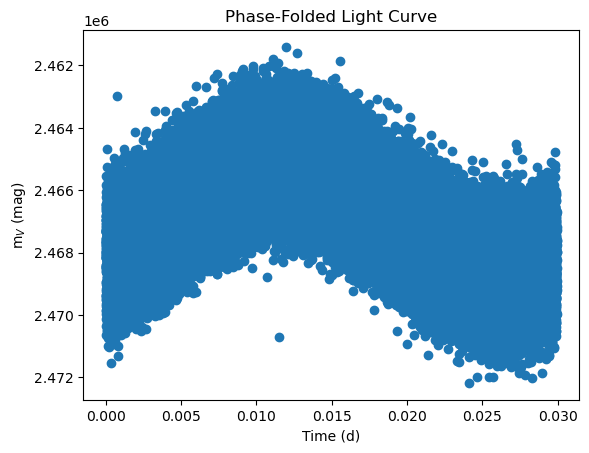

In [529]:
mod0299 = np.mod(t1['col1'], 0.029924066672608968) # i know this period from the Lomb-Scargle plot above
# there is a way of determining this period without using Lomb-Scargle, something much more simple I think, but I do not know what
plt.scatter(mod0299, t1['col2'])
plt.title("Phase-Folded Light Curve")
plt.xlabel("Time (d)")
plt.ylabel(r"m$_V$ (mag)")
plt.gca().invert_yaxis()

# this isn't quite right as x-axis should read 0 to phase 2, and have 2 sinusoids 

In [429]:
import numpy as np
from scipy import integrate
from astropy.modeling.models import BlackBody
from astropy import units as u, constants as c
import matplotlib.pyplot as plt

In [ ]:
# Integrate the BB spectrum to get power output by Sol...

In [434]:
# Stellar Initial Mass Function (IMF)
# Classes in Python

# NUMERICAL (vs analytical) INTEGRATION

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
# Integrate function from a to b (possibly infinite interval) using a technique from the Fortran library QUADPACK.

from scipy import integrate

class PowerLawPDF(object):
    def __init__(self, gamma, B=1.):
        self.gamma = gamma
        self.B = B
    def __call__(self, x):
        return x**self.gamma / self.B

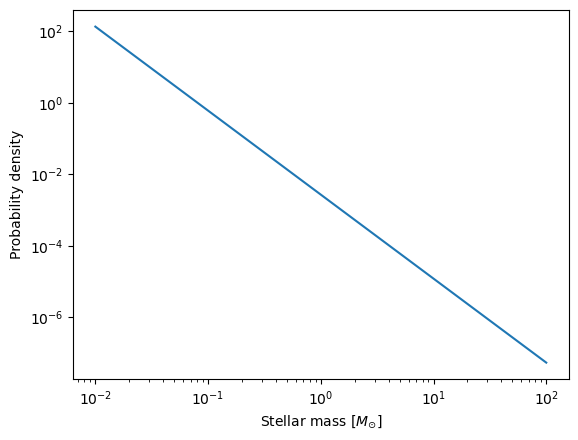

In [435]:
salpeter = PowerLawPDF(gamma=-2.35)
salpeter.B, _ = integrate.quad(salpeter, a=0.01, b=100.)

m_grid = np.logspace(-2., 2., 100)
plt.loglog(m_grid, salpeter(m_grid))
plt.xlabel(r'Stellar mass [$M_{\odot}$]')
plt.ylabel('Probability density')
plt.show()

In [436]:
# Ratio of low mass stars to high mass stars

n_m, _ = integrate.quad(salpeter, a=.01, b=.6)
n_o, _ = integrate.quad(salpeter, a=15., b=100.)
print(n_m / n_o)

20936.017868337378


In [24]:
# Displaying pdfs in Jupyter Notebook, example using stellar IMF plot...
from IPython.display import IFrame, display
filepath = "https://data.obs.carnegiescience.edu/starforge/IMF_AlphaPlot.pdf" # works with websites too!
# filepath = "file.pdf"
IFrame(filepath, width=700, height=400)

In [34]:
%%latex

\begin{equation}
\frac {dN}{d \log M} \propto M^{\Gamma_\textup{IMF}}
\end{equation}

<IPython.core.display.Latex object>

In [ ]:
# GAIA DATA - do something with this! https://www.gaia.ac.uk/mission/what-does-gaia-see
# Write a paper and publish!

# https://www.esa.int/Science_Exploration/Space_Science/Gaia - start here for inspiration!
# ?metalicity and geographical region of stars - e.g. how close to centre of galaxy, which part of galactic plane, in-plane vs off-plane; 
# does metallicity in the Milky Way spread in waves?; are there hot-spots in the distribution in Milky Way and can we postulate why that is so?
# ? hotspots due to previous SN explosions 
# to find habitable planets, follow the metal

# the real DOGS KNOB is to comnine data products from different science missions in novel ways
# so learn ALL the major science missions and how to access them thru astroquery; learnn how to cross-reference efficiently

# stellar censuses (e.g. Gaia) vs more focussed missions

In [ ]:
# GAIA Astrometry and Exoplanet Discovery
# https://www.cosmos.esa.int/web/gaia/iow_20240422

In [229]:
from astropy.coordinates import Angle, SkyCoord
from ipyaladin import Aladin, Marker
from pathlib import Path
aladin = Aladin()
aladin

Aladin()

In [233]:
aladin.target = "m33"
aladin.target


<SkyCoord (ICRS): (ra, dec) in deg
    (23.46206906, 30.66017511)>

In [231]:
# Planetary Surfaces

mars = Aladin(
    target="159.2135528 -58.6241989",
    survey="https://alasky.u-strasbg.fr/Planets/Mars_Viking_MDIM21",
    fov=10,
)
mars

/Users/spydoc/miniforge3/envs/astro313/lib/python3.13/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Aladin).__init__(target='159.2135528 -58.6241989', fov=10).
object.__init__() takes exactly one argument (the instance to initialize)
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


Aladin(survey='https://alasky.u-strasbg.fr/Planets/Mars_Viking_MDIM21')

In [232]:
mars.target = "Olympus Mons"

In [234]:
from ipyaladin import Aladin
from astropy.table import QTable
import astropy.units as u
from astroquery.simbad import Simbad

In [235]:
table = Simbad.query_region("Messier 1", radius=0.03 * u.deg)
table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
M 1,05 34 31.8,+22 01 03,5,5,5000.000,5000.000,90,D,X,2022A&A...661A..38P,1
Trimble 28,05 34 32.1,+22 00 56,5,5,--,--,0,D,,,1
2MASS J05343217+2200560,05 34 32.1831,+22 00 56.008,14,14,0.149,0.124,90,A,O,2020yCat.1350....0G,1
FHES J0534.5+2201,05 34 31.8623,+22 01 13.180,8,8,--,--,0,E,G,2018ApJS..237...32A,1
V* CM Tau,05 34 31.9474,+22 00 52.153,14,14,0.073,0.061,90,A,O,2020yCat.1350....0G,1
3FGL J0534.5+2201s,05 34 31.1993,+22 01 12.001,11,11,--,--,0,E,,2022ApJS..260...53A,1
2MASS J05343187+2201161,05 34 31.8813,+22 01 16.187,14,14,0.092,0.072,90,A,O,2020yCat.1350....0G,1
JCMTSF J053431.3+220045,05 34 31.3,+22 00 45,5,5,10000.000,10000.000,90,E,m,2008ApJS..175..277D,1


In [243]:
aladin

Aladin()

In [245]:
aladin.target="Messier 1"
aladin.fov=0.2
aladin.add_table(table, shape="rhomb", color="lightskyblue", source_size=20)
# This line also works with camelCase instead of snake_case: sourceSize=20

In [23]:
%%latex

\begin{equation}
f(x, \mu, \sigma) = \frac {1}{\sigma \sqrt{2\pi}} \exp \left[-\frac{1}{2} \left(\frac{x_i - \mu_i}{\sigma_i} \right)^2 \right]
\end{equation}

<IPython.core.display.Latex object>

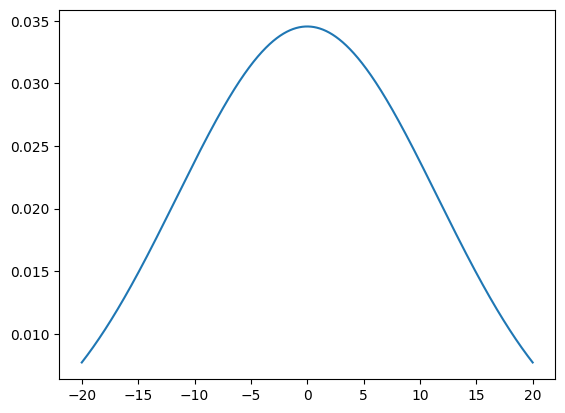

In [25]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import statistics 
  
# Plot between -10 and 10 with .001 steps. 
x_axis = np.arange(-20, 20, 0.01) 
  
# Calculating mean and standard deviation 
mean = statistics.mean(x_axis) 
sd = statistics.stdev(x_axis) 
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd)) 
plt.show() 

In [26]:
# Gaussian curve fit
# many options exist - astropy for one, which should probably be used whenever possible; the following uses scipy
# https://www.geeksforgeeks.org/python-gaussian-fit/

In [ ]:
from astroquery.mast import Observations
from astropy.io import fits

# Query Information
mission = "TESS"
dataProdType = ["timeseries"]
GiProgram = "*G011183*"
fileType = "Light curves"
sector = 1

# Query Mast Holdings
obsTable = Observations.query_criteria(obs_collection = mission,
                                       dataproduct_type = dataProdType,
                                       sequence_number = sector,
                                       proposal_id = GiProgram)

# Get Product List
dataProducts = Observations.get_product_list(obsTable[0:2])
want = dataProducts['description'] == fileType

# Download Data
manifest = Observations.download_products(dataProducts[want])
print(manifest)

fits.info(manifest['Local Path'][0])

In [4]:
# You can call qglue() from the IPython/Jupyter notebook normally. 
# However, the default behavior is for Glue to block the execution of the notebook while the UI is running. 
# If you would like to be able to use the notebook and Glue at the same time, run this cell before starting glue. 
# This must be executed in a separate cell, before starting Glue.

%gui qt

In [5]:
# https://docs.glueviz.org/en/stable/python_guide/glue_from_python.html

from glue_qt import qglue

In [9]:
# https://astroquery.readthedocs.io/en/latest/ipac/nexsci/nasa_exoplanet_archive.html
# https://exoplanetarchive.ipac.caltech.edu/docs/transition.html
# 

from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive

In [10]:
# Lists tables available
NasaExoplanetArchive.TAP_TABLES

# The PSCompPars Table is a more complete table of planet parameters combined from multiple references and calculations. 
# See this - https://exoplanetarchive.ipac.caltech.edu/docs/TAP/usingTAP.html - for definitions of what these tables are
# e.g. TD is a Transiting Planets table

['spectra',
 'TD',
 'pscomppars',
 'superwasptimeseries',
 'kelttimeseries',
 'DI_STARS_EXEP',
 'stellarhosts',
 'transitspec',
 'emissionspec',
 'ps',
 'keplernames',
 'k2names',
 'toi',
 'CUMULATIVE',
 'Q1_Q6_KOI',
 'Q1_Q8_KOI',
 'Q1_Q12_KOI',
 'Q1_Q16_KOI',
 'Q1_Q17_DR24_KOI',
 'Q1_Q17_DR25_KOI',
 'Q1_Q17_DR25_SUP_KOI',
 'Q1_Q12_TCE',
 'Q1_Q16_TCE',
 'Q1_Q17_DR24_TCE',
 'Q1_Q17_DR25_TCE',
 'stellarhosts',
 'ukirttimeseries',
 'ml',
 'object_aliases',
 'k2pandc',
 'K2TARGETS',
 'KEPLERTIMESERIES',
 'KEPLERSTELLAR',
 'Q1_Q12_KS',
 'Q1_Q16_KS',
 'Q1_Q17_DR24_KS',
 'Q1_Q17_DR25_KS',
 'Q1_Q17_DR25_SUP_KS']

In [14]:
# The number of confirmed planets discovered by TESS:
# The PSCompPars Table is a more complete table of planet parameters combined from multiple references and calculations. 
# https://exoplanetarchive.ipac.caltech.edu/docs/TAP/usingTAP.html

NasaExoplanetArchive.query_criteria(table="pscomppars", select="count(*)", where="disc_facility like '%Kepler%'")

count(*)
int32
2778


In [15]:
# The number of confirmed planets discovered by TESS:
NasaExoplanetArchive.query_criteria(table="pscomppars", select="count(*)", where="disc_facility like '%TESS%'")


count(*)
int32
571


In [17]:
# https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars
# use the above online table to decide which parameters want to query using selet="..."
NasaExoplanetArchive.query_criteria(table="pscomppars", select="top 10 pl_name,ra,dec", where="disc_facility like '%K2%'")

pl_name,ra,dec,sky_coord
,deg,deg,"deg,deg"
str16,float64,float64,SkyCoord
K2-150 b,18.3443908,8.9874328,"18.3443908,8.9874328"
K2-151 b,19.3047733,9.5012663,"19.3047733,9.5012663"
EPIC 220492298 b,16.7615005,6.588798,"16.7615005,6.588798"
K2-290 b,234.8578846,-20.1988975,"234.8578846,-20.1988975"
K2-138 g,348.9490311,-10.8497391,"348.9490311,-10.8497391"
K2-140 b,188.1373172,-9.6076115,"188.1373172,-9.6076115"
K2-141 c,350.9170464,-1.1891827,"350.9170464,-1.1891827"
K2-141 b,350.9170464,-1.1891827,"350.9170464,-1.1891827"


In [16]:
NasaExoplanetArchive.query_criteria(table="pscomppars", where="discoverymethod like 'Microlensing'")

objectid,pl_name,pl_letter,hostid,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,disc_method,discoverymethod,disc_locale,disc_facility,disc_instrument,disc_telescope,disc_refname,ra,raerr1,raerr2,rasymerr,rastr,ra_solnid,ra_reflink,dec,decerr1,decerr2,decsymerr,decstr,dec_solnid,dec_reflink,glon,glonerr1,glonerr2,glonsymerr,glonstr,glon_solnid,glon_reflink,glat,glaterr1,glaterr2,glatsymerr,glatstr,glat_solnid,glat_reflink,elon,elonerr1,elonerr2,elonsymerr,elonstr,elon_solnid,elon_reflink,elat,elaterr1,elaterr2,elatsymerr,elat_solnid,elat_reflink,elatstr,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbpersymerr,pl_orbperlim,pl_orbperstr,pl_orbperformat,pl_orbper_solnid,pl_orbper_reflink,pl_orblpererr1,pl_orblper,pl_orblpererr2,pl_orblpersymerr,pl_orblperlim,pl_orblperstr,pl_orblperformat,pl_orblper_solnid,pl_orblper_reflink,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxsymerr,pl_orbsmaxlim,pl_orbsmaxstr,pl_orbsmaxformat,pl_orbsmax_solnid,pl_orbsmax_reflink,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbinclsymerr,pl_orbincllim,pl_orbinclstr,pl_orbinclformat,pl_orbincl_solnid,pl_orbincl_reflink,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtpersymerr,pl_orbtperlim,pl_orbtperstr,pl_orbtperformat,pl_orbtper_solnid,pl_orbtper_reflink,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccensymerr,pl_orbeccenlim,pl_orbeccenstr,pl_orbeccenformat,pl_orbeccen_solnid,pl_orbeccen_reflink,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtsymerr,pl_eqtlim,pl_eqtstr,pl_eqtformat,pl_eqt_solnid,pl_eqt_reflink,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdepsymerr,pl_occdeplim,pl_occdepstr,pl_occdepformat,pl_occdep_solnid,pl_occdep_reflink,pl_insol,pl_insolerr1,pl_insolerr2,pl_insolsymerr,pl_insollim,pl_insolstr,pl_insolformat,pl_insol_solnid,pl_insol_reflink,pl_dens,pl_denserr1,sy_umagerr1,sy_umagerr2,sy_umaglim,sy_umagsymerr,sy_umagstr,sy_umagformat,sy_umag_solnid,sy_umag_reflink,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_rmaglim,sy_rmagsymerr,sy_rmagstr,sy_rmagformat,sy_rmag_solnid,sy_rmag_reflink,sy_imag,sy_imagerr1,sy_imagerr2,sy_imaglim,sy_imagsymerr,sy_imagstr,sy_imagformat,sy_imag_solnid,sy_imag_reflink,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_zmaglim,sy_zmagsymerr,sy_zmagstr,sy_zmagformat,sy_zmag_solnid,sy_zmag_reflink,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w1maglim,sy_w1magsymerr,sy_w1magstr,sy_w1magformat,sy_w1mag_solnid,sy_w1mag_reflink,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w2maglim,sy_w2magsymerr,sy_w2magstr,sy_w2magformat,sy_w2mag_solnid,sy_w2mag_reflink,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w3maglim,sy_w3magsymerr,sy_w3magstr,sy_w3magformat,sy_w3mag_solnid,sy_w3mag_reflink,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_w4maglim,sy_w4magsymerr,sy_w4magstr,sy_w4magformat,sy_w4mag_solnid,sy_w4mag_reflink,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_gmaglim,sy_gmagsymerr,sy_gmagstr,sy_gmagformat,sy_gmag_solnid,sy_gmag_reflink,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_gaiamaglim,sy_gaiamagsymerr,sy_gaiamagstr,sy_gaiamagformat,sy_gaiamag_solnid,sy_gaiamag_reflink,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_tmaglim,sy_tmagsymerr,sy_tmagstr,sy_tmagformat,sy_tmag_solnid,sy_tmag_reflink,sy_name,pl_controv_flag,pl_orbtper_systemref,pl_tranmid_systemref,st_metratio,st_spectype,st_spectype_solnid,st_spectype_reflink,sy_plxlim,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmaglim,sy_kepmagsymerr,sy_kepmagstr,sy_kepformat,sy_kepmag_solnid,sy_kepmag_reflink,st_rotp,st_rotperr1,st_rotperr2,st_rotpsymerr,st_rotplim,st_rotpstr,st_rotpformat,st_rotp_solnid,st_rotp_reflink,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqsymerr,pl_projobliqlim,pl_projobliqstr,pl_projobliqformat,pl_denserr2,pl_denssymerr,pl_denslim,pl_densstr,pl_densformat,pl_dens_solnid,pl_dens_reflink,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandepsymerr,pl_trandeplim,pl_trandepstr,pl_trandepformat,pl_trandep_solnid,pl_trandep_reflink,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidsymerr,pl_tranmidlim,pl_tranmidstr,pl_tranmidformat,pl_tranmid_solnid,pl_tranmid_reflink,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_tr

In [18]:
NasaExoplanetArchive.query_criteria(table="pscomppars", where="hostname like 'Kepler%'", order="hostname")

objectid,pl_name,pl_letter,hostid,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,disc_method,discoverymethod,disc_locale,disc_facility,disc_instrument,disc_telescope,disc_refname,ra,raerr1,raerr2,rasymerr,rastr,ra_solnid,ra_reflink,dec,decerr1,decerr2,decsymerr,decstr,dec_solnid,dec_reflink,glon,glonerr1,glonerr2,glonsymerr,glonstr,glon_solnid,glon_reflink,glat,glaterr1,glaterr2,glatsymerr,glatstr,glat_solnid,glat_reflink,elon,elonerr1,elonerr2,elonsymerr,elonstr,elon_solnid,elon_reflink,elat,elaterr1,elaterr2,elatsymerr,elat_solnid,elat_reflink,elatstr,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbpersymerr,pl_orbperlim,pl_orbperstr,pl_orbperformat,pl_orbper_solnid,pl_orbper_reflink,pl_orblpererr1,pl_orblper,pl_orblpererr2,pl_orblpersymerr,pl_orblperlim,pl_orblperstr,pl_orblperformat,pl_orblper_solnid,pl_orblper_reflink,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxsymerr,pl_orbsmaxlim,pl_orbsmaxstr,pl_orbsmaxformat,pl_orbsmax_solnid,pl_orbsmax_reflink,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbinclsymerr,pl_orbincllim,pl_orbinclstr,pl_orbinclformat,pl_orbincl_solnid,pl_orbincl_reflink,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtpersymerr,pl_orbtperlim,pl_orbtperstr,pl_orbtperformat,pl_orbtper_solnid,pl_orbtper_reflink,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccensymerr,pl_orbeccenlim,pl_orbeccenstr,pl_orbeccenformat,pl_orbeccen_solnid,pl_orbeccen_reflink,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtsymerr,pl_eqtlim,pl_eqtstr,pl_eqtformat,pl_eqt_solnid,pl_eqt_reflink,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdepsymerr,pl_occdeplim,pl_occdepstr,pl_occdepformat,pl_occdep_solnid,pl_occdep_reflink,pl_insol,pl_insolerr1,pl_insolerr2,pl_insolsymerr,pl_insollim,pl_insolstr,pl_insolformat,pl_insol_solnid,pl_insol_reflink,pl_dens,pl_denserr1,sy_umagerr1,sy_umagerr2,sy_umaglim,sy_umagsymerr,sy_umagstr,sy_umagformat,sy_umag_solnid,sy_umag_reflink,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_rmaglim,sy_rmagsymerr,sy_rmagstr,sy_rmagformat,sy_rmag_solnid,sy_rmag_reflink,sy_imag,sy_imagerr1,sy_imagerr2,sy_imaglim,sy_imagsymerr,sy_imagstr,sy_imagformat,sy_imag_solnid,sy_imag_reflink,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_zmaglim,sy_zmagsymerr,sy_zmagstr,sy_zmagformat,sy_zmag_solnid,sy_zmag_reflink,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w1maglim,sy_w1magsymerr,sy_w1magstr,sy_w1magformat,sy_w1mag_solnid,sy_w1mag_reflink,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w2maglim,sy_w2magsymerr,sy_w2magstr,sy_w2magformat,sy_w2mag_solnid,sy_w2mag_reflink,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w3maglim,sy_w3magsymerr,sy_w3magstr,sy_w3magformat,sy_w3mag_solnid,sy_w3mag_reflink,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_w4maglim,sy_w4magsymerr,sy_w4magstr,sy_w4magformat,sy_w4mag_solnid,sy_w4mag_reflink,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_gmaglim,sy_gmagsymerr,sy_gmagstr,sy_gmagformat,sy_gmag_solnid,sy_gmag_reflink,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_gaiamaglim,sy_gaiamagsymerr,sy_gaiamagstr,sy_gaiamagformat,sy_gaiamag_solnid,sy_gaiamag_reflink,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_tmaglim,sy_tmagsymerr,sy_tmagstr,sy_tmagformat,sy_tmag_solnid,sy_tmag_reflink,sy_name,pl_controv_flag,pl_orbtper_systemref,pl_tranmid_systemref,st_metratio,st_spectype,st_spectype_solnid,st_spectype_reflink,sy_plxlim,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmaglim,sy_kepmagsymerr,sy_kepmagstr,sy_kepformat,sy_kepmag_solnid,sy_kepmag_reflink,st_rotp,st_rotperr1,st_rotperr2,st_rotpsymerr,st_rotplim,st_rotpstr,st_rotpformat,st_rotp_solnid,st_rotp_reflink,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqsymerr,pl_projobliqlim,pl_projobliqstr,pl_projobliqformat,pl_denserr2,pl_denssymerr,pl_denslim,pl_densstr,pl_densformat,pl_dens_solnid,pl_dens_reflink,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandepsymerr,pl_trandeplim,pl_trandepstr,pl_trandepformat,pl_trandep_solnid,pl_trandep_reflink,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidsymerr,pl_tranmidlim,pl_tranmidstr,pl_tranmidformat,pl_tranmid_solnid,pl_tranmid_reflink,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_tr

In [23]:
# can also do cone searches
import astropy.units as u
from astropy.coordinates import SkyCoord
NasaExoplanetArchive.query_region(table="pscomppars", coordinates=SkyCoord(ra=172.56 * u.deg, dec=7.59 * u.deg), radius=5.0 * u.deg) 

objectid,pl_name,pl_letter,hostid,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,disc_method,discoverymethod,disc_locale,disc_facility,disc_instrument,disc_telescope,disc_refname,ra,raerr1,raerr2,rasymerr,rastr,ra_solnid,ra_reflink,dec,decerr1,decerr2,decsymerr,decstr,dec_solnid,dec_reflink,glon,glonerr1,glonerr2,glonsymerr,glonstr,glon_solnid,glon_reflink,glat,glaterr1,glaterr2,glatsymerr,glatstr,glat_solnid,glat_reflink,elon,elonerr1,elonerr2,elonsymerr,elonstr,elon_solnid,elon_reflink,elat,elaterr1,elaterr2,elatsymerr,elat_solnid,elat_reflink,elatstr,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbpersymerr,pl_orbperlim,pl_orbperstr,pl_orbperformat,pl_orbper_solnid,pl_orbper_reflink,pl_orblpererr1,pl_orblper,pl_orblpererr2,pl_orblpersymerr,pl_orblperlim,pl_orblperstr,pl_orblperformat,pl_orblper_solnid,pl_orblper_reflink,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxsymerr,pl_orbsmaxlim,pl_orbsmaxstr,pl_orbsmaxformat,pl_orbsmax_solnid,pl_orbsmax_reflink,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbinclsymerr,pl_orbincllim,pl_orbinclstr,pl_orbinclformat,pl_orbincl_solnid,pl_orbincl_reflink,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtpersymerr,pl_orbtperlim,pl_orbtperstr,pl_orbtperformat,pl_orbtper_solnid,pl_orbtper_reflink,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccensymerr,pl_orbeccenlim,pl_orbeccenstr,pl_orbeccenformat,pl_orbeccen_solnid,pl_orbeccen_reflink,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtsymerr,pl_eqtlim,pl_eqtstr,pl_eqtformat,pl_eqt_solnid,pl_eqt_reflink,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdepsymerr,pl_occdeplim,pl_occdepstr,pl_occdepformat,pl_occdep_solnid,pl_occdep_reflink,pl_insol,pl_insolerr1,pl_insolerr2,pl_insolsymerr,pl_insollim,pl_insolstr,pl_insolformat,pl_insol_solnid,pl_insol_reflink,pl_dens,pl_denserr1,sy_umagerr1,sy_umagerr2,sy_umaglim,sy_umagsymerr,sy_umagstr,sy_umagformat,sy_umag_solnid,sy_umag_reflink,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_rmaglim,sy_rmagsymerr,sy_rmagstr,sy_rmagformat,sy_rmag_solnid,sy_rmag_reflink,sy_imag,sy_imagerr1,sy_imagerr2,sy_imaglim,sy_imagsymerr,sy_imagstr,sy_imagformat,sy_imag_solnid,sy_imag_reflink,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_zmaglim,sy_zmagsymerr,sy_zmagstr,sy_zmagformat,sy_zmag_solnid,sy_zmag_reflink,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w1maglim,sy_w1magsymerr,sy_w1magstr,sy_w1magformat,sy_w1mag_solnid,sy_w1mag_reflink,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w2maglim,sy_w2magsymerr,sy_w2magstr,sy_w2magformat,sy_w2mag_solnid,sy_w2mag_reflink,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w3maglim,sy_w3magsymerr,sy_w3magstr,sy_w3magformat,sy_w3mag_solnid,sy_w3mag_reflink,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_w4maglim,sy_w4magsymerr,sy_w4magstr,sy_w4magformat,sy_w4mag_solnid,sy_w4mag_reflink,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_gmaglim,sy_gmagsymerr,sy_gmagstr,sy_gmagformat,sy_gmag_solnid,sy_gmag_reflink,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_gaiamaglim,sy_gaiamagsymerr,sy_gaiamagstr,sy_gaiamagformat,sy_gaiamag_solnid,sy_gaiamag_reflink,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_tmaglim,sy_tmagsymerr,sy_tmagstr,sy_tmagformat,sy_tmag_solnid,sy_tmag_reflink,sy_name,pl_controv_flag,pl_orbtper_systemref,pl_tranmid_systemref,st_metratio,st_spectype,st_spectype_solnid,st_spectype_reflink,sy_plxlim,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmaglim,sy_kepmagsymerr,sy_kepmagstr,sy_kepformat,sy_kepmag_solnid,sy_kepmag_reflink,st_rotp,st_rotperr1,st_rotperr2,st_rotpsymerr,st_rotplim,st_rotpstr,st_rotpformat,st_rotp_solnid,st_rotp_reflink,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqsymerr,pl_projobliqlim,pl_projobliqstr,pl_projobliqformat,pl_denserr2,pl_denssymerr,pl_denslim,pl_densstr,pl_densformat,pl_dens_solnid,pl_dens_reflink,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandepsymerr,pl_trandeplim,pl_trandepstr,pl_trandepformat,pl_trandep_solnid,pl_trandep_reflink,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidsymerr,pl_tranmidlim,pl_tranmidstr,pl_tranmidformat,pl_tranmid_solnid,pl_tranmid_reflink,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_tr

In [ ]:
# Roughly 10% of planetary systems will be in favourable alignment to Earth observer for a transit past the host star. 
# Where this numner from? Look up Transiting Exoplanets book from OU - there's a calculation in an early chapter based on Super-WASP

# How many stars withon 10 Pc or 25 Pc of Earth? - https://chview.nova.org/solcom/stars/pc10.htm


In [36]:
# Using the Glue API - more flexibility than 'from glue_qt import qglue' in above cell

from glue.core.data_factories import load_data
from glue.core import DataCollection
from glue.core.link_helpers import LinkSame
from glue_qt.app.application import GlueApplication

# load 2 datasets from files
image = load_data('w5/w5.fits')
catalog = load_data('w5/w5_psc.vot')
dc = DataCollection([image, catalog])

# link positional information
dc.add_link(LinkSame(image.id['Right Ascension'], catalog.id['RAJ2000']))
dc.add_link(LinkSame(image.id['Declination'], catalog.id['DEJ2000']))

# start Glue
app = GlueApplication(dc)
app.start()

2024-11-30 17:33:52.783 python[62692:2600931] +[IMKClient subclass]: chose IMKClient_Modern


0

In [51]:
from astroquery.vizier import Vizier

Vizier.ROW_LIMIT = -1  # this switches off the default limit if 50 rows to a table
catalog = Vizier.get_catalogs('J/A+A/649/A6/table1c')
print(catalog)

TableList with 1 tables:
	'0:J/A+A/649/A6/table1c' with 31 column(s) and 331312 row(s) 


In [158]:
table_gcns = catalog[0]
table_gcns

GaiaEDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,RV,Dist50,xcoord50,ycoord50,zcoord50,Uvel50,Vvel50,Wvel50,gmag,rmag,imag,zmag,Jmag,Hmag,Ksmag,W1mag,W2mag,W3mag,W4mag,GAIAEDR3Cat,_RA.icrs,_DE.icrs
,deg,deg,mas,mas / yr,mas / yr,mag,mag,mag,km / s,kpc,pc,pc,pc,km / s,km / s,km / s,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,deg,deg
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,str11,float64,float64
2334666126716440064,0.0025650,-26.3653495,14.697,23.497,-62.339,15.7779,17.4299,14.5407,--,0.06803,11.27021,7.54892,-66.66381,--,--,--,17.796,16.549,15.059,14.396,12.833,12.267,11.977,11.799,11.606,11.100,9.074,GAIAEDR3Cat,0.0024484,-26.3650724
2341871673090078592,0.0051210,-19.4988406,26.798,179.805,-1.041,8.9429,9.4761,8.2513,--,0.03739,4.10140,8.09092,-36.27160,--,--,--,9.979,8.946,8.662,9.726,7.402,6.975,6.807,6.868,6.800,6.722,6.704,GAIAEDR3Cat,0.0042732,-19.4988360
530861741656374272,0.0056369,70.8873639,10.282,-52.864,17.787,10.8521,11.3022,10.2396,-26.204,0.09726,-46.21263,84.37781,14.27200,32.872,-13.707,8.930,--,--,--,--,9.523,9.079,9.007,8.965,9.024,8.937,8.649,GAIAEDR3Cat,0.0063545,70.8872848
2745400068346761216,0.0093361,6.5110167,16.260,117.495,9.521,16.2772,18.2886,14.9456,--,0.06152,-6.73827,35.40890,-49.85672,--,--,--,18.661,17.399,15.571,14.717,12.922,12.312,12.031,11.866,11.660,11.630,8.881,GAIAEDR3Cat,0.0088105,6.5109744
2855176271335676800,0.0135364,29.2778958,10.295,51.287,46.282,15.6236,17.0649,14.4501,--,0.09716,-27.65700,77.35709,-51.86940,--,--,--,17.406,16.202,14.932,14.344,12.876,12.282,12.081,11.907,11.743,11.589,9.077,GAIAEDR3Cat,0.0132751,29.2776901
4616265759236854016,0.0148925,-86.5417045,8.276,15.239,14.097,20.7053,21.4042,19.0972,--,0.11751,56.35943,-84.11356,-59.63383,--,--,--,--,--,--,--,16.323,15.729,15.282,15.021,14.847,13.058,9.303,GAIAEDR3Cat,0.0137697,-86.5417672
2875125810310195712,0.0157909,34.1883005,20.194,-227.366,-56.934,8.3483,8.6769,7.8431,-29.942,0.04952,-15.72239,41.02444,-22.85814,61.074,-5.584,12.826,12.388,12.293,12.445,9.007,7.249,6.940,6.885,7.249,6.922,6.883,6.824,GAIAEDR3Cat,0.0170125,34.1885535
2335003848584711040,0.0159102,-25.4988391,12.613,-25.099,-17.494,14.6687,16.1144,13.4936,--,0.07931,12.57312,9.85767,-77.68060,--,--,--,16.457,15.264,13.971,13.404,11.925,11.293,11.037,10.926,10.774,10.602,8.804,GAIAEDR3Cat,0.0160338,-25.4987613


In [159]:
table_gcns['RA_ICRS']

0.0025650
0.0051210
0.0056369
0.0093361
0.0135364
0.0148925
0.0157909
0.0159102
0.0165201
0.0196790
0.0210048


In [105]:
# Another wqay of accessing table columns, and turning them into arrays
ra = np.array(catalog[0]['RA_ICRS'])
dec = np.array(catalog[0]['DE_ICRS'])

In [215]:
# Access astronomical databases
from pyvo import registry  # version >=1.4.1 

# Moc and HEALPix tools
from mocpy import MOC

# Sky visualization
from astropy.coordinates import Angle, SkyCoord
from ipyaladin import Aladin, Marker

# For plots
import matplotlib.pyplot as plt

In [160]:
# the catalogue name in VizieR
CATALOGUE = "J/A+A/649/A6"

In [165]:
# We first retrieve catalogue information.

# each resource in the VO (Virtual Observatory) has an identifier, called ivoid. For vizier catalogs,
# the VO ids can be constructed like this:
catalogue_ivoid = f"ivo://CDS.VizieR/{CATALOGUE}"
# the actual query to the registry
voresource = registry.search(ivoid=catalogue_ivoid)[0]

In [166]:
# We can print metadata information about the catalogue
voresource.describe(verbose=True)

Gaia Catalogue of Nearby Stars - GCNS
Short Name: J/A+A/649/A6
IVOA Identifier: ivo://cds.vizier/j/a+a/649/a6
Access modes: conesearch, tap#aux, web
- tap#aux: http://tapvizier.cds.unistra.fr/TAPVizieR/tap
- webpage: http://vizier.cds.unistra.fr/viz-bin/VizieR-2?-source=J/A+A/649/A6
- conesearch: http://vizier.cds.unistra.fr/viz-
 bin/conesearch/J/A+A/649/A6/missing?, description: Cone search capability for
 table J/A+A/649/A6/missing (Objects with parallax > 10mas)
- conesearch: http://vizier.cds.unistra.fr/viz-
 bin/conesearch/J/A+A/649/A6/table1c?, description: Cone search capability for
 table J/A+A/649/A6/table1c (Selected objects)
- conesearch: http://vizier.cds.unistra.fr/viz-
 bin/conesearch/J/A+A/649/A6/table1r?, description: Cone search capability for
 table J/A+A/649/A6/table1r (Rejected objects)

We produce a clean and well-characterised catalogue of objects within 100 pc
of the Sun from the Gaia Early Data Release 3. We characterise the catalogue
through comparisons to the

In [172]:
# We can also inspect in details the object and access the attributes not provided by the describe method. See for example, the first author of a resource:
voresource.creators[0]

'Gaia collaboration'

In [173]:
# We can have a look at the tables available in the catalogue.

tables = voresource.get_tables()
tables

{'J/A+A/649/A6/hyacomb': <VODataServiceTable name="J/A+A/649/A6/hyacomb">... 5 columns ...</VODataServiceTable>,
 'J/A+A/649/A6/table1c': <VODataServiceTable name="J/A+A/649/A6/table1c">... 78 columns ...</VODataServiceTable>,
 'J/A+A/649/A6/table1r': <VODataServiceTable name="J/A+A/649/A6/table1r">... 78 columns ...</VODataServiceTable>,
 'J/A+A/649/A6/progwd': <VODataServiceTable name="J/A+A/649/A6/progwd">... 4 columns ...</VODataServiceTable>,
 'J/A+A/649/A6/table3': <VODataServiceTable name="J/A+A/649/A6/table3">... 10 columns ...</VODataServiceTable>,
 'J/A+A/649/A6/maglim': <VODataServiceTable name="J/A+A/649/A6/maglim">... 104 columns ...</VODataServiceTable>,
 'J/A+A/649/A6/missing': <VODataServiceTable name="J/A+A/649/A6/missing">... 10 columns ...</VODataServiceTable>,
 'J/A+A/649/A6/distpdf': <VODataServiceTable name="J/A+A/649/A6/distpdf">... 104 columns ...</VODataServiceTable>}

In [174]:
# We can also extract the tables names for later use
tables_names = list(tables.keys())
tables_names

['J/A+A/649/A6/hyacomb',
 'J/A+A/649/A6/table1c',
 'J/A+A/649/A6/table1r',
 'J/A+A/649/A6/progwd',
 'J/A+A/649/A6/table3',
 'J/A+A/649/A6/maglim',
 'J/A+A/649/A6/missing',
 'J/A+A/649/A6/distpdf']

In [175]:
# The actual data can then be access using any of the access_modes of the voresource (aka VO resource).

voresource.access_modes()

{'conesearch', 'tap#aux', 'web'}

In [176]:
# The web access is found by following the reference_url

voresource.reference_url

'https://cdsarc.cds.unistra.fr/viz-bin/cat/J/A+A/649/A6'

In [178]:
# The tap#aux in the access_mode response indicates that we can also do a SQL/ADQL query for these VizieR tables.

# On the first table of the catalogue, we execute an ADQL query.

# get the first table of the catalogue
first_table_name = tables_names[0]

# execute a synchronous ADQL query
tap_service = voresource.get_service("tap")
tap_records = voresource.get_service("tap").run_sync(
f'select TOP 10 * from "{first_table_name}"',
)
tap_records

<DALResultsTable length=10>
recno       GaiaEDR3      Cluster MembCluster DistCluster
                                                   pc    
int32        int64         object   float64     float64  
----- ------------------- ------- ----------- -----------
    1 3312644885984344704  Hyades       0.574       0.741
    2 3313285110990793472  Hyades       0.115       0.749
    3 3314137846679343872  Hyades       0.239       0.943
    4 3312536927686011520  Hyades       5.601       0.958
    5 3312904233289409152  Hyades        0.33       1.072
    6 3314109916508904064  Hyades       2.306       1.091
    7 3313173957237081984  Hyades       0.562       1.143
    8 3313751441358252160  Hyades       2.621       1.148
    9 3312709379213017728  Hyades       0.078       1.181
   10 3314212068010812032  Hyades       0.274       1.232

In [200]:
# we use the Simple Cone Search (SCS) protocol of the virtual observatory (only available for tables with positions).

# Adapt the radius and position of the center to your needs.

# Note: catalogue J/A+A/649/A6 contains 3 SimpleConeSearch. Only one is available via pyvo yet.

conesearch_radius = 1 / 60.0  # in degrees
conesearch_center = (45.3515625, 0.46627939418012637)

conesearch_records = voresource.get_service("conesearch", lax=True).search(
pos=conesearch_center,
sr=conesearch_radius
)
conesearch_records

<DALResultsTable length=1>
   _r    recno    GaiaEDR3    ... GAIAEDR3Cat   _RA.icrs    _DE.icrs 
                              ...                 deg         deg    
float64  int32     str19      ...    str11      float64     float64  
-------- ----- -------------- ... ----------- ----------- -----------
0.007148 40309 41888816866304 ... GAIAEDR3Cat  45.3508399   0.4734479

In [201]:
# VizieR also provides the coverage of each catalogue with Multiple Order Coverage (MOC) at order 10 -- meaning with a 0.001 rad spacial resolution.

# retrieve the MOC
catalogue_coverage = MOC.from_fits(
f"https://cdsarc.cds.unistra.fr/viz-bin/moc/{CATALOGUE}",
)
catalogue_coverage.display_preview()


/Users/spydoc/miniforge3/envs/astro313/lib/python3.13/site-packages/mocpy/moc/moc.py:2580: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [210]:
# We can plot the coverage with matplotlib.

fig = plt.figure(figsize=(5, 5))
wcs = catalogue_coverage.wcs(fig)
ax = fig.add_subplot(projection=wcs)
catalogue_coverage.fill(ax=ax, wcs=wcs, alpha=0.5, color="blue")
plt.show()

/var/folders/yh/dfgfv0352h73q219zg7p_hsw0000gn/T/ipykernel_62692/1030394248.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [219]:
#  We can add the tables and coverage in this ipyaladin window.
aladin = Aladin()
aladin

Aladin()

In [220]:
aladin.add_table(conesearch_records.to_table())
aladin.add_table(tap_records.to_table())
aladin.add_moc(
f"https://cdsarc.cds.unistra.fr/viz-bin/moc/{CATALOGUE}",
moc_options={"opacity": 0.5, "color": "pink"},
)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from astroquery.gaia import Gaia
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive

from astropy.table import Table

from itertools import chain

In [278]:
# Pretty matplotlib defaults

linewidths = 2
axislinewidths = 2 
lenticks = 6
font = 18

rc('font', family='sans-serif', size=font)
rc('xtick.major', size=lenticks)
rc('xtick.minor', size=lenticks *2/3)
rc('ytick.major', size=lenticks)
rc('ytick.minor', size=lenticks *2/3)
rc('lines', linewidth=linewidths)
rc('axes', linewidth=axislinewidths)

In [279]:
# Overview of table names available from GAIA

tables = Gaia.load_tables(only_names=True)
for table in (tables):
    if 'gaiadr3' in table.get_qualified_name():
        print (table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]


INFO:astroquery:Retrieving tables...


INFO: Parsing tables... [astroquery.utils.tap.core]


INFO:astroquery:Parsing tables...


INFO: Done. [astroquery.utils.tap.core]
gaiadr3.gaiadr3.gaia_source
gaiadr3.gaiadr3.gaia_source_lite
gaiadr3.gaiadr3.astrophysical_parameters
gaiadr3.gaiadr3.astrophysical_parameters_supp
gaiadr3.gaiadr3.oa_neuron_information
gaiadr3.gaiadr3.oa_neuron_xp_spectra
gaiadr3.gaiadr3.total_galactic_extinction_map
gaiadr3.gaiadr3.total_galactic_extinction_map_opt
gaiadr3.gaiadr3.commanded_scan_law
gaiadr3.gaiadr3.allwise_best_neighbour
gaiadr3.gaiadr3.allwise_neighbourhood
gaiadr3.gaiadr3.apassdr9_best_neighbour
gaiadr3.gaiadr3.apassdr9_join
gaiadr3.gaiadr3.apassdr9_neighbourhood
gaiadr3.gaiadr3.dr2_neighbourhood
gaiadr3.gaiadr3.gsc23_best_neighbour
gaiadr3.gaiadr3.gsc23_join
gaiadr3.gaiadr3.gsc23_neighbourhood
gaiadr3.gaiadr3.hipparcos2_best_neighbour
gaiadr3.gaiadr3.hipparcos2_neighbourhood
gaiadr3.gaiadr3.panstarrs1_best_neighbour
gaiadr3.gaiadr3.panstarrs1_join
gaiadr3.gaiadr3.panstarrs1_neighbourhood
gaiadr3.gaiadr3.ravedr5_best_neighbour
gaiadr3.gaiadr3.ravedr5_join
gaiadr3.gaiadr3.rave

/Users/spydoc/miniforge3/envs/astro313/lib/python3.13/socket.py:790: ResourceWarning: unclosed <ssl.SSLSocket fd=105, family=2, type=1, proto=0, laddr=('192.168.1.217', 51326), raddr=('193.147.152.106', 443)>
  self._sock = None
INFO:astroquery:Done.


In [10]:
# Request data from GCNS for sources < 10 pc
# Convert from parallax (in mas) to pc by 1000/pc (if it was measured in arcseconds, the formula would be 1/pc)

# A good example of using ADQL for querying an astronomical database
# We enter "WHERE parallax >50" (greater than) as it's inverse, i.e. distance is one over parallax
# The GCNS resides here: external.gaiaedr3_gcns_main_1

job = Gaia.launch_job_async(
"SELECT source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag \
FROM external.gaiaedr3_gcns_main_1 \
WHERE parallax >100"
)

gtable = job.get_results()
print(gtable.info)
print(gtable)

INFO: Query finished. [astroquery.utils.tap.core]
<Table length=312>
      name        dtype  unit                                                                                               description                                                                                               n_bad
---------------- ------- ---- ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- -----
       source_id   int64                                                                                                    Gaia eDR3 unique source identifier. Note that this *cannot* be matched against the DR1 or DR2 source_ids.     0
              ra float64  deg                                                                                                                                                                    ICRS right ascension from Gaia

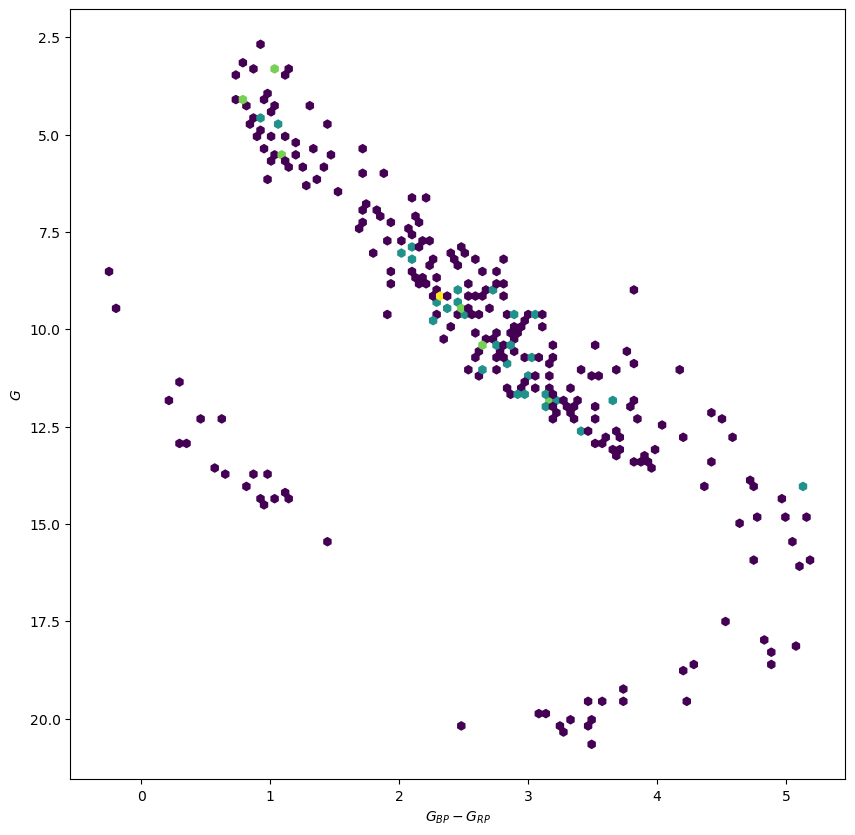

In [11]:
# Create a color-magnitude diagram (CMD), with apparent magnitude on y-axis

%matplotlib inline

bp_rp = gtable['phot_bp_mean_mag'] - gtable['phot_rp_mean_mag'] 
g_mag = gtable['phot_g_mean_mag']

fig, axcmd = plt.subplots(1, 1, figsize=(10, 10))

axcmd.hexbin(bp_rp, g_mag, bins='log', mincnt=1)
axcmd.set_xlabel('$G_{BP}-G_{RP}$')
axcmd.set_ylabel('$G$')
axcmd.invert_yaxis()

plt.show()


In [6]:
# Create a HRD, with absolute magnitude on y-axis; using the distance modulus

%matplotlib inline

bp_rp = gtable['phot_bp_mean_mag'] - gtable['phot_rp_mean_mag'] 
G_Mag = gtable['phot_g_mean_mag'] + 5 * np.log10(gtable['parallax']) - 10
# This is the distance modulus...
# same formula as "gtable['phot_g_mean_mag'] -5 * np.log10((1000/gtable['parallax'])/10)"
# units of parallax are in mas (milliarcseconds)

fig, axcmd = plt.subplots(1, 1, figsize=(10, 10))

axcmd.hexbin(bp_rp, G_Mag, bins='log', mincnt=1)
axcmd.set_xlabel('$G_{BP}-G_{RP}$')
axcmd.set_ylabel('$M_G$')
axcmd.invert_yaxis()

plt.show()

NameError: name 'gtable' is not defined

In [322]:
# List the columns available in the selected (GCNS) table

gcns_table = Gaia.load_table('external.gaiaedr3_gcns_main_1')
gcns_table.columns
for column in gcns_table.columns:
    print (column.name, "    ", column.description)

source_id      Gaia eDR3 unique source identifier. Note that this *cannot* be matched against the DR1 or DR2 source_ids.
ra      ICRS right ascension from Gaia eDR3.
dec      ICRS declination from Gaia eDR3.
ra_error      Standard error of ra (with cos δ applied).
dec_error      Standard error of dec
parallax      Absolute barycentric stellar parallax of the source at the reference epoch J2016.0. If looking for a distance, consider joining with gedr3dist.main and using the distances from there.
parallax_error      Standard error of parallax
pmra      Proper motion in right ascension of the source in ICRS at J2016.0. This is the tangent plane projection of the proper motion vector in the direction of increasing right ascension.
pmra_error      Standard error of pmra
pmdec      Proper motion in declination at J2016.0.
pmdec_error      Standard error of pmdec
phot_g_mean_mag      Mean magnitude in the G band. This is computed from the G-band mean flux applying the magnitude zero-point in 

/Users/spydoc/miniforge3/envs/astro313/lib/python3.13/socket.py:790: ResourceWarning: unclosed <ssl.SSLSocket fd=106, family=2, type=1, proto=0, laddr=('192.168.1.217', 51540), raddr=('193.147.152.106', 443)>
  self._sock = None


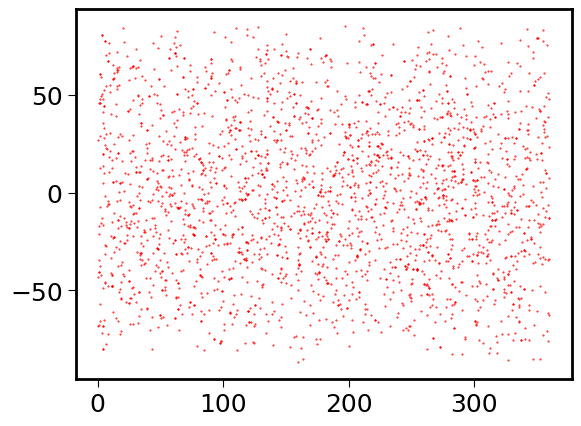

In [348]:
plt.scatter(gtable['ra'], gtable['dec'], s=0.2, c='r')
# shows a reasonably uniform spread of catalogue sources over the entire sky

Using matplotlib backend: inline


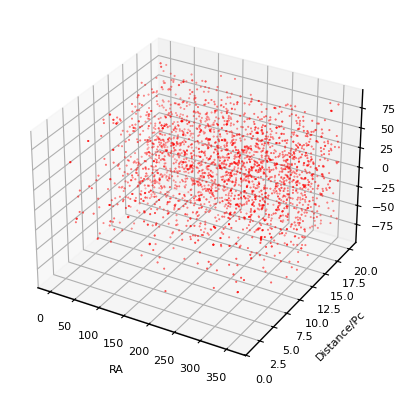

In [361]:
# 3D plot of volume of 20 Pc star catalogue


linewidths = 1
axislinewidths = 1 
lenticks = 6
font = 8

rc('font', family='sans-serif', size=font)
rc('xtick.major', size=lenticks)
rc('xtick.minor', size=lenticks *2/3)
rc('ytick.major', size=lenticks)
rc('ytick.minor', size=lenticks *2/3)
rc('lines', linewidth=linewidths)
rc('axes', linewidth=axislinewidths)


import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax3d = fig.add_subplot(projection='3d')

xs = gtable['ra']
ys = 1000 / gtable['parallax']
zs = gtable['dec']

ax3d.scatter(xs, ys, zs, s=0.2, c='r')

ax3d.set_xlabel('RA')
ax3d.set_zlabel('Dec')
ax3d.set_ylabel('Distance/Pc')

plt.show()

In [2]:
# Plots as an HTML page

import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.write_html('first_figure.html', auto_open=True)

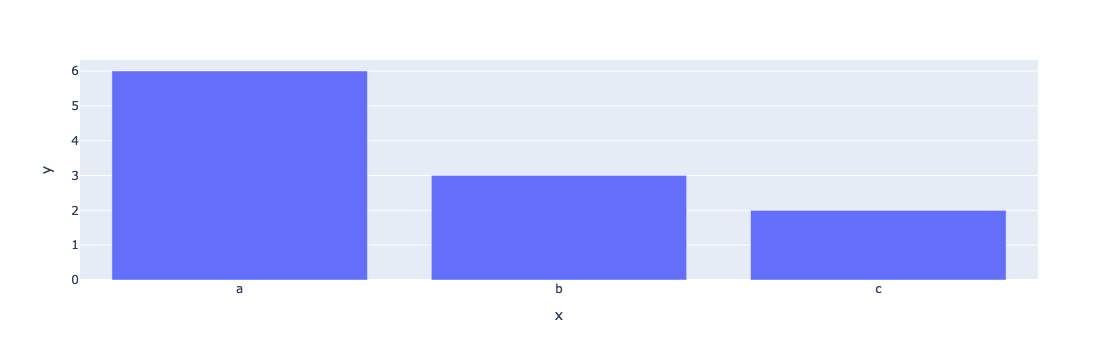

In [3]:
# Should plot inline here BUT issues with matplotlib backend! But a bit flaky
# Can solve this, probably, by ubderstanding this...
# https://matplotlib.org/stable/users/explain/figure/backends.html

%matplotlib ipympl
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[6, 3, 2])
fig.show()

In [1]:
%matplotlib ipympl
import plotly.express as px

xs = gtable['ra']
ys = gtable['dec']
zs = 1000 / gtable['parallax']

fig = px.scatter_3d(x=xs, y=ys, z=zs, hover_name = gtable['source_id'])
fig.show()
fig.write_html('first_figure.html', auto_open=True)

NameError: name 'gtable' is not defined

In [ ]:
# Interact plotly with glue for an awesome workflow!

In [ ]:
%%latex

/

/

In [22]:
# Using glue in notebook via API calls

from glue.core.data_factories import load_data
from glue.core import DataCollection
from glue.core.link_helpers import LinkSame
from glue_qt.app.application import GlueApplication

# load 2 datasets from files
image = load_data('w5/w5.fits')
catalog = load_data('w5/w5_psc.vot')
dc = DataCollection([image, catalog])

# link positional information
dc.add_link(LinkSame(image.id['Right Ascension'], catalog.id['RAJ2000']))
dc.add_link(LinkSame(image.id['Declination'], catalog.id['DEJ2000']))

# start Glue
app = GlueApplication(dc)
app.start()

2024-12-04 16:39:35.119 python[75036:4699397] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-04 16:39:35.119 python[75036:4699397] +[IMKInputSession subclass]: chose IMKInputSession_Modern


0

,ra,dec,parallax
0,316.753663,38.756073,3.496438
1,316.748479,38.763862,3.496565
2,298.481926,44.412906,4.660386
3,327.072395,40.068518,8.085693
4,341.702825,44.331953,5.051594
...,...,...,...
307,30.160435,-55.968261,8.216356
308,53.567196,-49.890084,8.880209
309,43.771986,-47.016728,4.867955
310,54.003394,-44.514362,3.674289


In [ ]:
# Exporting a pandas dataframe to glue
# Useful for accessing glue for manipulating, say, pandas dataframes created in a notebook
# http://docs.glueviz.org/en/stable/python_guide/data_translation.html

from pandas import DataFrame
df1 = DataFrame()
# data from gtable from GCNS above
df1['ra'] = xs 
df1['dec'] = ys
df1['parallax'] = zs

from glue.core.data_factories import load_data
from glue.core import DataCollection
from glue.core.link_helpers import LinkSame
from glue_qt.app.application import GlueApplication

dc = DataCollection()
dc['dataframe'] = df1

# start Glue
app = GlueApplication(dc)
app.start()

2024-12-04 18:48:53.697 python[75036:4699397] The class 'NSSavePanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


Exception: Can only add a scatter plot overlay once a volume is present

Exception: Can only add a scatter plot overlay once a volume is present

In [5]:
from astropy.io import fits
from astrodendro import Dendrogram

from glue.core.data_factories import load_data
from glue.core import DataCollection
from glue.core.link_helpers import LinkSame
from glue_qt.app.application import GlueApplication


data = fits.getdata('w5/W5.fits')
dg = Dendrogram.compute(data, min_value=500, min_npix=50, verbose=False) 
dg.save_to('w5/w5_dendro.fits')

# load 2 datasets from files
image = load_data('w5/w5.fits')
dendrogram = load_data('w5/w5_dendro.fits')
df = DataCollection([image, dendrogram])

# start Glue
app = GlueApplication(df)
app.start()

# # not sure if this is working in glue!
# the next cell uses astrodendro to do the plotting

Generating dendrogram using 173,268 of 1,000,000 pixels (17.3268% of data)

[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 0%
[>                                        ] 1%
[>                                        ] 1%
[>                             

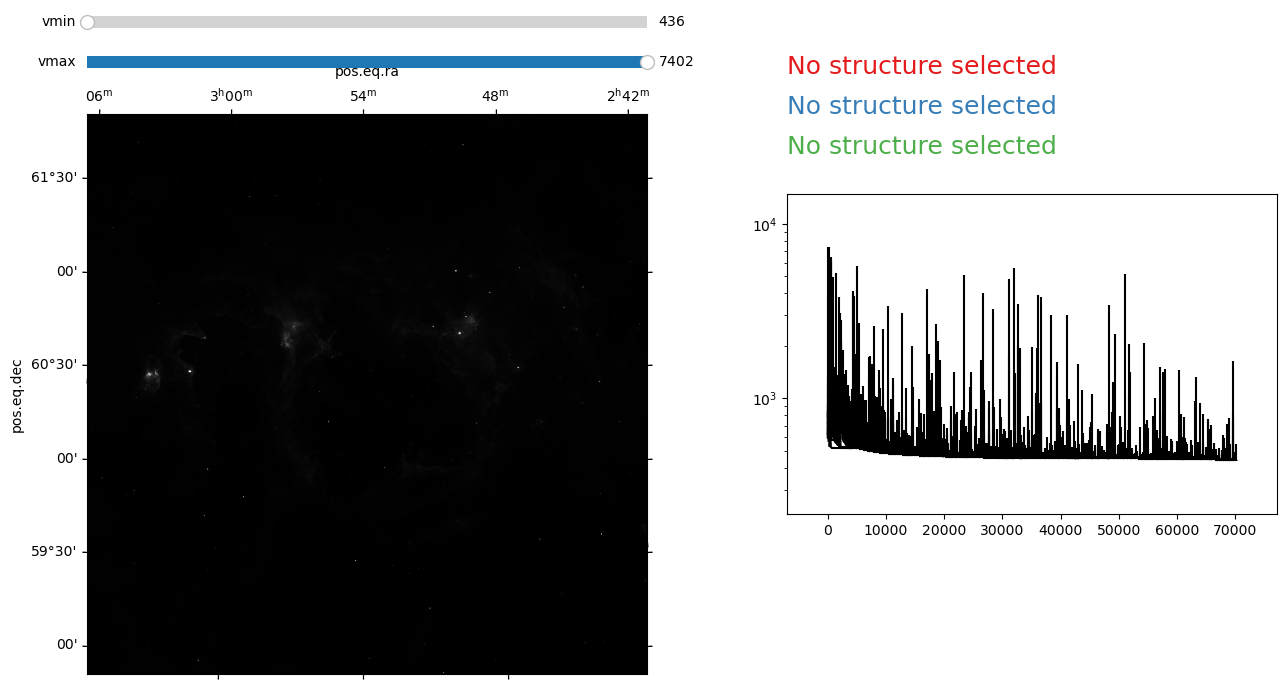

In [9]:
from astropy.io.fits import getdata
from astropy import wcs

data, header = fits.getdata('w5/W5.fits', header=True)
wcs = wcs.WCS(header)
d = Dendrogram.compute(data, wcs=wcs)
v = d.viewer()
v.show()

# See tutorial for further plotting options - https://dendrograms.readthedocs.io/en/stable/plotting.html

In [28]:
import numpy as np
import requests
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

%matplotlib inline

planeturl = "https://exo.mast.stsci.edu/api/v0.1/exoplanets/"
dvurl = "https://exo.mast.stsci.edu/api/v0.1/dvdata/tess/"
header={}

planet_name = "WASP-18 b"

url = planeturl + "/identifiers/"

myparams = {"name":planet_name}

r = requests.get(url = url, params = myparams, headers = header)
print(r.headers.get('content-type'))

application/json


In [29]:
planet_names = r.json()
ticid = planet_names['tessID']
tce = planet_names['tessTCE']
planet_names

# A TESS TCE is a transit crossing threshold

{'canonicalName': 'WASP-18 b',
 'starName': 'WASP-18',
 'ra': 24.354208334287005,
 'dec': -45.677930555343636,
 'planetNames': ['CPC 0 759 b',
  'UBV 1689 b',
  'HIP 7562 b',
  'PPM 306061 b',
  '2MASS J01372503-4540404 b',
  'TYC 8040-72-1 b',
  'WASP-18 b',
  'SAO 215585 b',
  'GEN# +1.00010069 b',
  '[CS62] E1 13 b',
  'HIC 7562 b',
  'Gaia DR1 4955371363037611136 b',
  'CPD-46 168 b',
  'CD-46 449 b',
  'GSC 08040-00072 b',
  'HD 10069 b'],
 'keplerID': None,
 'keplerTCE': None,
 'tessID': 100100827,
 'tessTCE': 'TCE_1'}

In [42]:
url = planeturl + planet_name + "/properties/"

r = requests.get(url = url, headers = header)

planet_prop = r.json()

print("Catalog 1: " + planet_prop[0]['catalog_name'])
print("Catalog 2: " + planet_prop[1]['catalog_name'])
planet_prop[0].keys()

Catalog 1: exoplanets.org
Catalog 2: nexsci


dict_keys(['canonical_name', 'exoplanetID', 'catalog_name', 'planet_name', 'disposition', 'modified_date', 'star_name', 'component', 'Rs', 'Rs_unit', 'Rs_upper', 'Rs_lower', 'Rs_ref', 'Rs_url', 'Ms', 'Ms_unit', 'Ms_upper', 'Ms_lower', 'Ms_ref', 'Ms_url', 'Fe/H', 'Fe/H_upper', 'Fe/H_lower', 'Fe/H_ref', 'Fe/H_url', 'stellar_gravity', 'stellar_gravity_upper', 'stellar_gravity_lower', 'stellar_gravity_ref', 'stellar_gravity_url', 'Teff', 'Teff_unit', 'Teff_upper', 'Teff_lower', 'Teff_ref', 'Teff_url', 'Vmag', 'Vmag_unit', 'Vmag_upper', 'Vmag_lower', 'Vmag_ref', 'Vmag_url', 'Jmag', 'Jmag_unit', 'Jmag_upper', 'Jmag_lower', 'Jmag_ref', 'Jmag_url', 'Hmag', 'Hmag_unit', 'Hmag_upper', 'Hmag_lower', 'Hmag_ref', 'Hmag_url', 'Kmag', 'Kmag_unit', 'Kmag_upper', 'Kmag_lower', 'Kmag_ref', 'Kmag_url', 'RA', 'DEC', 'distance', 'distance_unit', 'distance_upper', 'distance_lower', 'distance_ref', 'distance_url', 'Rp', 'Rp_unit', 'Rp_upper', 'Rp_lower', 'Rp_ref', 'Rp_url', 'Mp', 'Mp_unit', 'Mp_upper', 'Mp_l

In [36]:
print("WASP-18  Properties")
print("Stellar Mass %f %s" % (planet_prop[0]['Ms'], planet_prop[0]['Ms_unit'] ) )
print("Planet Mass %f %s" % (planet_prop[0]['Mp'], planet_prop[0]['Mp_unit'] ) )
print("Planet Mass Reference: %s" % (planet_prop[0]['Mp_ref']))

WASP-18  Properties
Stellar Mass 1.220000 M_sun
Planet Mass 10.200600 M_Jupiter
Planet Mass Reference: Calculated from MSINI and I


In [32]:
url = dvurl + str(ticid) + '/tces/'
myparams = {"tce" : tce}

r = requests.get(url = url, params = myparams, headers = header)
sectorInfo = r.json()

sectors = [x[:11] for x in sectorInfo["TCE"] if tce in x]
sectors

['s0001-s0003',
 's0001-s0036',
 's0001-s0069',
 's0002-s0002',
 's0003-s0003',
 's0029-s0029',
 's0030-s0030',
 's0069-s0069']

In [43]:
myparams = {"tce" : tce,
            "sector" : sectors[0]}

r = requests.get(url = url, params = myparams, headers = header)
tceInfo = r.json()
tceInfo.keys()
tceInfo['DV Data Header'].keys()

print("TIC: %s" % tceInfo['DV Primary Header']['OBJECT'])
print("Planet Radius: %f" % tceInfo['DV Data Header']['PRADIUS'])

AttributeError: 'list' object has no attribute 'keys'

In [35]:
# Get The data
url = dvurl + str(ticid) + '/table/'
myparams = {"tce" : tce,
            "sector" : sectors[0]}

r = requests.get(url = url, params = myparams, headers = header)
tce_data = r.json()

In [37]:
data = pd.DataFrame.from_dict(tce_data['data'])
data.columns

Index(['PHASE', 'LC_DETREND', 'MODEL_INIT'], dtype='object')

Text(0, 0.5, 'Relative Flux')

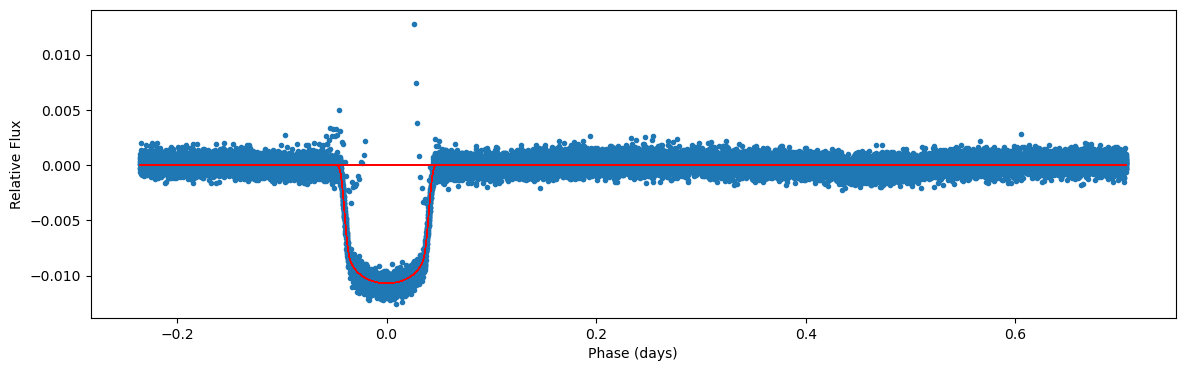

In [38]:
detrend = data['LC_DETREND']
model = data['MODEL_INIT']
time = data['PHASE']

plt.figure(figsize=(14,4))
plt.plot(time,detrend,'.',lw=0.4)
plt.plot(time,model,'r-',lw=0.6)
plt.xlabel('Phase (days)')
plt.ylabel('Relative Flux')

In [39]:
url = dvurl + str(ticid) + '/phaseplot/'
myparams = {"tce" : tce,
            "sector" : sectors[0]}

r = requests.get(url = url, params = myparams, headers = header)

In [41]:
display(HTML(str(r.content.decode('utf-8'))))

In [ ]:
import lightkurve as lk

In [256]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c

# RV equations from Haswell book
# values are for Jupyter

M_P = 1 * c.M_jup
M_S = 1 * c.M_sun
P = 12 * 365.25 * 24 * 60 * 60 * u.s

# Keplerian elements 
a = 5 * c.au
e = 0.05
omega_p = 1 * np.pi # argument of periastrion
Omega = 0 # position angle of nodes
i = np.pi/2 # Jupyter is actually inclined at 1.3 degrees to th ecclipitc; I've used sky plane as a reference instead of eccliptic
f = np.arange(0, 4 * np.pi, 0.01)  # start, stop, step; # f is the true anomaly (angle) that depends on time

A_RV = (2 * np.pi * a * M_P * np.sin(i)) / ((M_S + M_P) * P * np.sqrt(1 - e**2))
orbit = np.cos(f + omega) + e * np.cos(omega)
V_t = A_RV * orbit

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
/var/folders/yh/dfgfv0352h73q219zg7p_hsw0000gn/T/ipykernel_93068/292441768.py:2: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('Phases / $\pi$')


Text(0, 0.5, 'Stellar RV m/s')

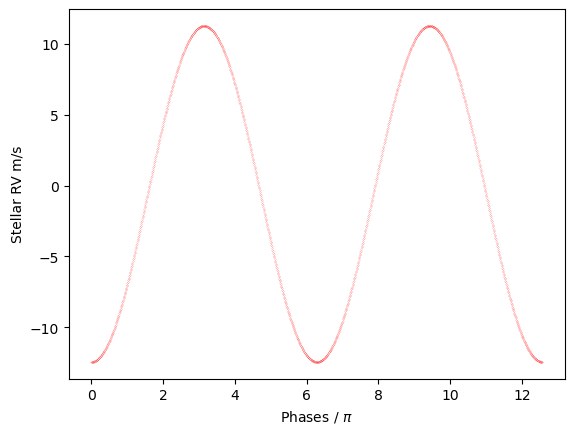

In [257]:
plt.scatter(f, V_t, c='r', s=0.01)
plt.xlabel('Phases / $\pi$')
plt.ylabel('Stellar RV m/s')

<Quantity 1.8981246e+27 kg>

TypeError: scatter() got an unexpected keyword argument 'animation'

In [159]:
# https://www.youtube.com/watch?v=VmRHKWoHYzs&t=702s

# for non-circular orbits, need this equation for true anomaly

f = 2 * np.arctan(np.sqrt((1 + e)/(1 - e)) * np.tan(E / 2))

delta_ra = np.pi * a * (1 - E * np.cos(E)) * (np.cos(i/2)**2 * np.sin(f + omega_p + Omega) - np.sin(i/2)**2 * np.sin(f + omega_p - Omega))

delta_dec = np.pi * a * (1 - E * np.cos(E)) * (np.cos(i/2)**2 * np.cos(f + omega_p + Omega) + np.sin(i/2)**2 * np.cos(f + omega_p - Omega))

NameError: name 'E' is not defined

In [ ]:
# Kepler's equation:   M(t) = E - e sin(E)
# In other words, given t/M, how do you get E/f ?
# Use numerical methods to solve, e.g. Newton-Raphson method: solve for the zero of the function?
# f(E) = E - e sin(E) - M(t)

In [ ]:
# Solving Kepler's equation - using C-code
# https://projectpluto.com/kepler.htm

In [162]:
# Python solver for Kepler's equation
# https://www.johndcook.com/blog/2022/11/01/kepler-newton/
# https://www.johndcook.com/blog/2022/11/02/keplers-equation-python/

# If e < 0.3 then Machin’s starting point is accurate to 4 d.p.

from numpy import sqrt, cbrt, pi, sin, cos, arcsin, random
    
# This will solve the special form of the cubic we need.
def solve_cubic(a, c, d):
        assert(a > 0 and c > 0)
        p = c/a
        q = d/a
        k = sqrt( q**2/4 + p**3/27 )
        return cbrt(-q/2 - k) + cbrt(-q/2 + k)
    
# Machin's starting point for Newton's method
# See johndcook.com/blog/2022/11/01/kepler-newton/
def machin(e, M):
        n = sqrt(5 + sqrt(16 + 9/e))
        a = n*(e*(n**2 - 1)+1)/6
        c = n*(1-e)
        d = -M
        s = solve_cubic(a, c, d)
        return n*arcsin(s)    
    
def solve_kepler(e, M):
        "Find E such that M = E - e sin E."
        assert(0 <= e < 1)
        assert(0 <= M <= pi) 
        f = lambda E: E - e*sin(E) - M 
        E = machin(e, M) 
        tolerance = 1e-10 

        # Newton's method 
        while (abs(f(E)) > tolerance):
            E -= f(E)/(1 - e*cos(E))
        return E

In [164]:
# This tests it
random.seed(20221102)
N = 1_000_000
e = random.random(N)
M = random.random(N)*pi
for i in range(N):
        E = solve_kepler(e[i], M[i])
        k = E - e[i]*sin(E) - M[i]
        assert(abs(k) < 1e-10)
print("Done")

Done


In [370]:
# EASIEST WAY OF SOLVING KEPLER'S EQUATION!

# Kepler's equation:   M(t) = E - e sin(E)

# https://en.wikipedia.org/wiki/Mean_anomaly

# use kepler.py by Dan Foreman-Mackey (dfm)
# https://github.com/dfm/kepler.py?tab=readme-ov-file
# pip install kepler.py

import kepler

# t = xxx * c.s
# P = 12 * 365.25 * 24 * 3600 * c.s
# tau = xxx * c.s
# tau_ref = xxx * c.s

# M = 2 * np.pi * (t/P - (tau - tau_ref))
# tau is time of perisastron passage, exressed as a fraction of orbital period

# ? units of E and M are u.arcsec, or in u.rad

M = np.arange(0, np.pi, 0.01) # range between 0 and 2pi.  ? how do I add units; a function of time, really M(t)
e = 0.999 # between 0 and 1

E, cos_f, sin_f = kepler.kepler(M, e)

Text(0, 0.5, 'Eccentric Anomaly (E)')

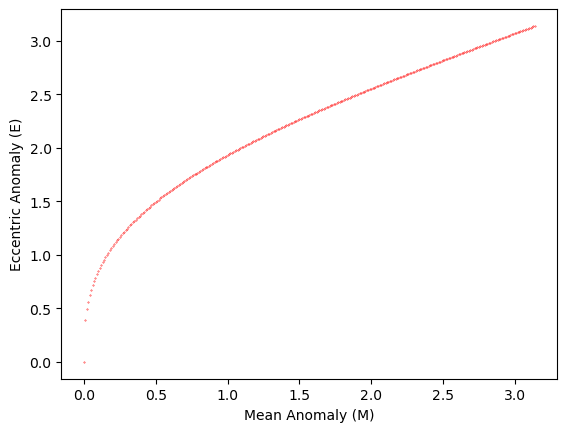

In [372]:
plt.scatter(M, E, c='r', s=0.1)
plt.xlabel('Mean Anomaly (M)')
plt.ylabel('Eccentric Anomaly (E)')

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
/var/folders/yh/dfgfv0352h73q219zg7p_hsw0000gn/T/ipykernel_93068/2102314319.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('Mean Anomaly (M) / $\pi$ rad')
/var/folders/yh/dfgfv0352h73q219zg7p_hsw0000gn/T/ipykernel_93068/2102314319.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('Eccentric Anomaly (E) / $\pi$ rad')


Text(0, 0.5, 'Eccentric Anomaly (E) / $\\pi$ rad')

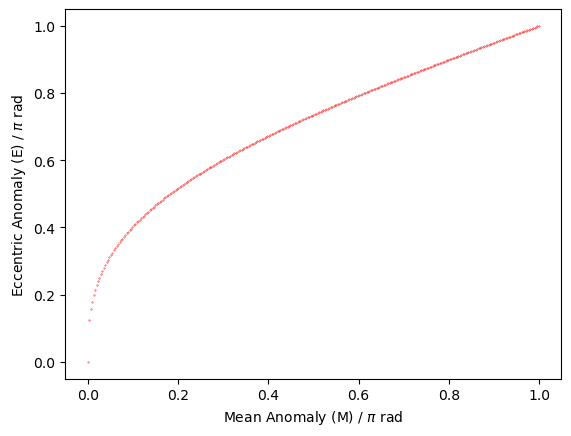

In [389]:
# A lower level interface that gives E alone
import kepler
eccentric_anomaly = kepler.solve(M, e)

plt.scatter(M/np.pi, E/np.pi, c='r', s=0.1)
plt.xlabel('Mean Anomaly (M) / $\pi$ rad')
plt.ylabel('Eccentric Anomaly (E) / $\pi$ rad')

In [394]:
# The following equations are derived in Murray & Correia 2011
# file:///Users/spydoc/Downloads/Keplerian_Orbits_and_Dynamics_of_Exoplanets.pdf

plx = 2 * (u.arcsecond/1000) # parallax in milliarcseconds
a = 5 * c.au

# The following 3 elements describe the orientattion of the orbit, wrt ... (?plane of sky)
# Not sure if should be multiplying by u.rad
i = 1 * np.pi * u.rad
omega_p = np.pi * u.rad
Omega = 0 * np.pi * u.rad

# The anomalies - f, E and M - are all functions of time

f = 2 * np.arctan(np.sqrt((1 + e) / (1 - e)) * np.tan(E / 2)) * u.rad

delta_ra = plx * a * (1 - E * np.cos(E)) * (np.cos(i/2)**2 * np.sin(f + omega_p + Omega) - np.sin(i/2)**2 * np.sin(f + omega_p - Omega))

delta_dec = plx * a * (1 - E * np.cos(E)) * (np.cos(i/2)**2 * np.cos(f + omega_p + Omega) + np.sin(i/2)**2 * np.cos(f + omega_p - Omega))

# Note plx * a gives the angular seperation of the orbit - it's just a scaling (constant) factor when it comes to plotting

In [397]:
delta_ra

<Quantity [-1.83204554e-07,  2.15921704e+08,  1.50092181e+08,
            1.20084829e+08,  1.02340330e+08,  9.05421841e+07,
            8.21578420e+07,  7.59429627e+07,  7.12040685e+07,
            6.75197581e+07,  6.46172175e+07,  6.23110566e+07,
            6.04703717e+07,  5.89998141e+07,  5.78281242e+07,
            5.69008812e+07,  5.61757510e+07,  5.56192738e+07,
            5.52046352e+07,  5.49100837e+07,  5.47177835e+07,
            5.46129691e+07,  5.45833112e+07,  5.46184351e+07,
            5.47095496e+07,  5.48491580e+07,  5.50308301e+07,
            5.52490217e+07,  5.54989294e+07,  5.57763726e+07,
            5.60776982e+07,  5.63997021e+07,  5.67395638e+07,
            5.70947928e+07,  5.74631832e+07,  5.78427760e+07,
            5.82318268e+07,  5.86287786e+07,  5.90322389e+07,
            5.94409592e+07,  5.98538186e+07,  6.02698088e+07,
            6.06880211e+07,  6.11076356e+07,  6.15279115e+07,
            6.19481785e+07,  6.23678295e+07,  6.27863143e+07,
        

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/var/folders/yh/dfgfv0352h73q219zg7p_hsw0000gn/T/ipykernel_93068/1229225162.py:2: SyntaxWarning: invalid escape sequence '\d'
  plt.xlabel('$\delta$ RA')
/var/folders/yh/dfgfv0352h73q219zg7p_hsw0000gn/T/ipykernel_93068/1229225162.py:3: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\delta$ Dec')


Text(0, 0.5, '$\\delta$ Dec')

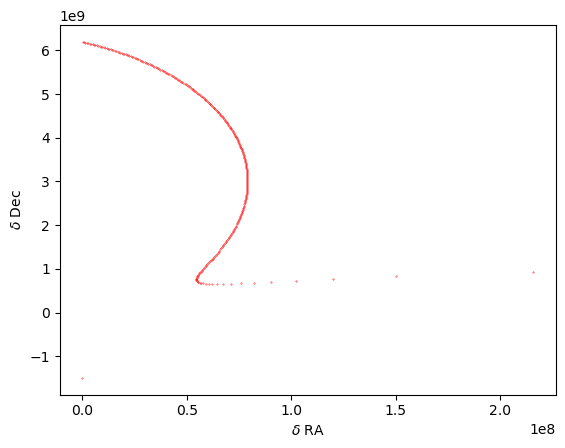

In [396]:
plt.scatter(delta_ra, delta_dec, s=0.1, c='r')
plt.xlabel('$\delta$ RA (arcsec m)')
plt.ylabel('$\delta$ Dec  (arcsec m)')

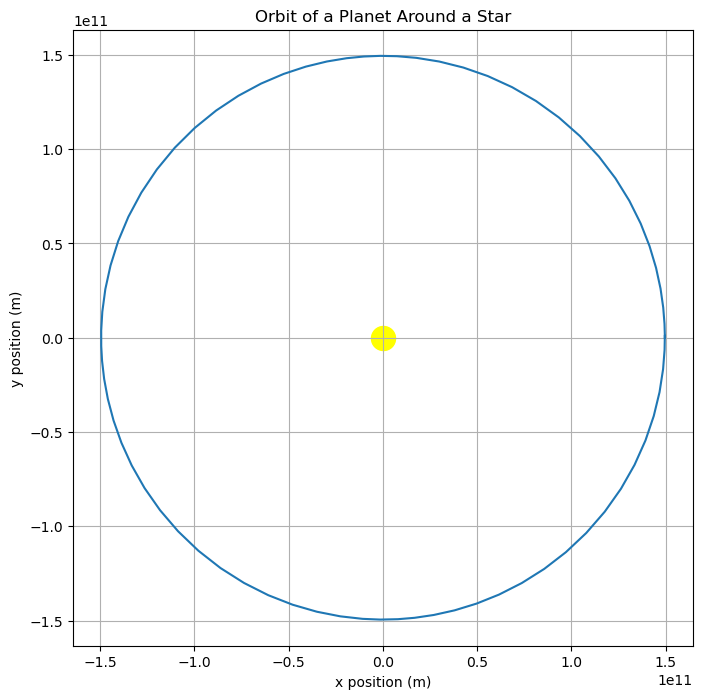

In [403]:
# Created by Perplexity AI 

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2
M_star = 1.989e30  # Mass of the star (e.g., the Sun), kg
M_planet = 5.972e24  # Mass of the planet (e.g., Earth), kg

# Initial conditions
# Position (x, y) and velocity (vx, vy) of the planet
x0 = 1.496e11  # Initial x position (1 AU), meters
y0 = 0.0  # Initial y position, meters
vx0 = 0.0  # Initial x velocity, meters/second
vy0 = 29.78e3  # Initial y velocity, meters/second

# Time span for the simulation (one year)
t_span = (0, 365.25 * 24 * 3600)  # seconds

# Function to compute derivatives
def derivatives(t, y):
    x, y, vx, vy = y
    r = np.sqrt(x**2 + y**2)
    ax = -G * M_star * x / r**3
    ay = -G * M_star * y / r**3
    return [vx, vy, ax, ay]

# Initial state vector
y0 = [x0, y0, vx0, vy0]

# Solve the differential equations using solve_ivp
solution = solve_ivp(derivatives, t_span, y0, method='RK45', rtol=1e-8)

# Extract results
x_sol = solution.y[0]
y_sol = solution.y[1]

# Plot the orbit
plt.figure(figsize=(8, 8))
plt.plot(x_sol, y_sol)
plt.scatter(0, 0, color='yellow', s=300)  # Star at the origin
plt.title('Orbit of a Planet Around a Star')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.grid(True)
plt.axis('equal')
plt.show()


In [15]:
"""
F-STRINGS
Really useful way of populting strings with data
Demontsrates use of camelCase

This also demonstrates conversions to different units,
and demonstrates string formatting, i.e.
printing rounded to 2dp, and this doesn't propogate rounding to next calculation
"""

import numpy as np
import astropy.units as u

galaxyDistance = 10 * u.Mpc
galaxyFlux = 2.5e-16 * u.erg / u.s / u.cm**2

galaxyLuminosity = 4 * np.pi * galaxyFlux * galaxyDistance**2

print(f'The Galaxy luminosity is {galaxyLuminosity.to(u.Lsun):.2f}') 
# the :.2f gives a print-out to 2dp 

The Galaxy luminosity is 781.41 solLum


0.8509035245341184

In [50]:
flux = 9
flag = 1

if (flux > 10) and (flag==1):
    calc = -2.5 * np.log(flux)
    print(calc)
else: print('bummer')

bummer


In [30]:
my_dict.values()

dict_values(['value1', 10, [1, 2, 3, 4]])

In [66]:
"""
Effective temperature at surface of an exoplanet.
First for a single star (Earth and Sol), then for a circumbinary planet (CBP).
"""

import numpy as np
import astropy.units as u
import astropy.constants as c

tStar = 5778 * u.K  # temp of star
rStar = 1 * c.R_sun  # radius of star in units of sun radii
a = 1 * c.au  # semimajor axis of planet's orbit around star
aB = 0.294 # Bond albedo (for Earth)

tEff = tStar * np.sqrt(rStar / (2 * a)) * (1 - aB)**(1/4)

print(f'The effective temperature of the planet is {tEff:.0f}') 

The effective temperature of the planet is 255 K


In [70]:
"""
Next stage is crudely to add two stars together
"""

import numpy as np
import astropy.units as u
import astropy.constants as c

tStar1 = 5778 * u.K  # temp of G-star
rStar1 = 1 * c.R_sun  # radius of star in units of sun radii
a1 = 1 * c.au  # semimajor axis of planet's orbit around star

tStar2 = 3900 * u.K  # temp of M-dwarf
rStar2 = 0.21 * c.R_sun  # radius of star in units of sun radii; in this case for an M-dwarf
a2 = 1 * c.au  # semimajor axis of planet's orbit around star

aB = 0.294 # Bond albedo (for Earth)

tEff = ((tStar1 * np.sqrt(rStar1 / (2 * a1)))+(tStar2 * np.sqrt(rStar2 / (2 * a2)))) * (1 - aB)**(1/4)

print(f'The effective temperature of the planet is {tEff:.0f}') 

The effective temperature of the planet is 334 K


In [ ]:
"""
First ignore transits of stars or planets. Assume a slightly off-ecliptic orbit of the CPB that 
means a constant illumination from both stars throughout the full orbital phase of the planet.
The distance of the planet varies from the stars - 
so a1 and a2 become functions that change over the course of the circumbinary orbit.
tEff thus becomes a function of orbital position of planet in orbit
Assume circular orbits (around barycentres) of all bodies in the first approximation. 
tStar_n and rStar_n are constants. 
Use basic physics - distance from star falls off as 1/r^2
"""

In [ ]:
"""
Next factor in primary and secondary eclipses of stars with each other. 
"""

In [ ]:
"""
Next I'd get some real parameters for a Kepler system with a CPB...
"""

In [1]:
"""
OO (object-orientated, aka stateless) Matplotlib plotting
https://realpython.com/python-matplotlib-guide/
https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/

Invest time learning this now, and will pay dividends when it comes to fancy plotting

Hiya
"""

'\nOO (object-orientated, aka stateless) Matplotlib plotting\nhttps://realpython.com/python-matplotlib-guide/\nhttps://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/\n\nInvest time learning this now, and will pay dividends when it comes to fancy plotting\n\nHiya\n'

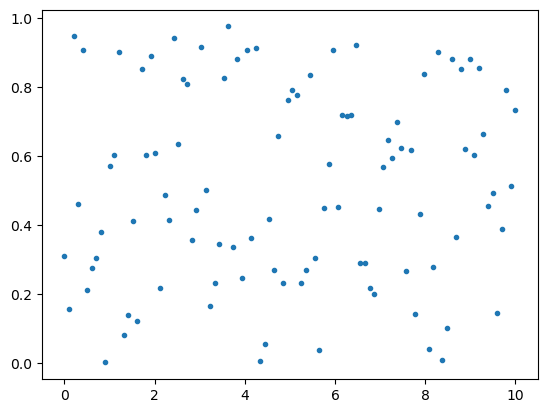

In [ ]:
"""Exploring Matplotlib
Using 'Astronomical Python' by Imad Pasha as a guide"""

"""The following is the non-OOP method of plotting"""
x = np.linspace(0, 10, 100)
y = np.random.random(size=len(x))
plt.plot(x, y, '.') # '.' is the marker style; by adding a marker style the data points become disconnected
plt.show()  # this is the command that actually displays the plot; not necessary if using a notebook

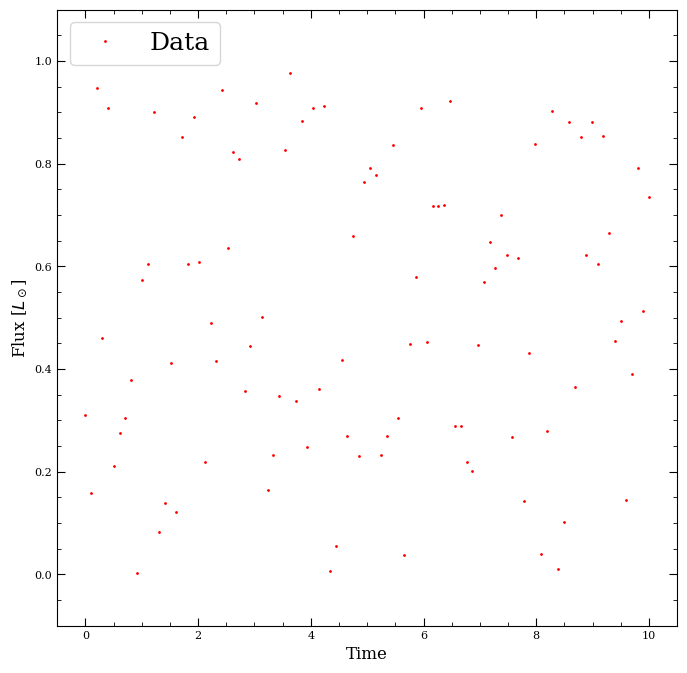

'\nMore examples of subplots and plotting fits and error bars are presented in the book.\nSee also: https://matplotlib.org/stable/gallery/ticks_and_spines/multiple_locators.html\n'

In [38]:
"""The following is the OOP method of plotting"""

plt.rc("font", size=16, family="serif")  # sets the font size globally for the plot

fig, ax = plt.subplots(figsize=(8,8))  # creates a figure and a set of subplots
ax.plot(x, y, 'o', ms=1, color='red', label='Data')  # plot the data; ms = markersize

ax.legend(loc=2, prop={'size': 18})  # adds a legend to the plot
ax.set_xlabel('Time', fontsize=12)  # adds a label to the x-axis
ax.set_ylabel(r'Flux [$L_\odot$]', fontsize=12)  # adds a label to the y-axis; prepend with r to get LaTeX-style formatting
ax.set_ylim(-0.1, 1.1)  # sets the limits of the y-axis

# plotting minor ticks on the axes
# we can create a simple loop with a parameter dictionary to save some lines

from matplotlib.ticker import MultipleLocator # this is a class that helps with setting the minor ticks on the axes

for prop in [('major', 6),('minor', 3)]:
    ax.tick_params(which=prop[0],
                   axis='both',
                   direction='in',
                   length=prop[1],
                   top=True,
                   right=True,
                   labelsize=8)  # sets the direction and length of the ticks on the y-axis
XminorLocator = MultipleLocator(0.5)  # sets the minor ticks on the x-axis
YminorLocator = MultipleLocator(0.05)  # sets the minor ticks on the y-axis
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)

plt.show()  # display the plot


"""
More examples of subplots and plotting fits and error bars are presented in the book.
See also: https://matplotlib.org/stable/gallery/ticks_and_spines/multiple_locators.html
"""